# Natural Language Processing Course
# Exercise 3

### CentraleSupélec 2022

## Authors: Maxence Gélard - Marien Chenaud

This Notebook contains our work for the third exercise of the NLP course.

The cell below will install all the required dependencies. Note that you will have to restart your runtime after the installation as asked by some packages (transformers, nltk ...)

In [1]:
!pip install datasets
!pip install sacrerouge sacrebleu bert-score

!git clone https://github.com/huggingface/transformers.git
!pip install ./transformers/.
!pip install sentencepiece
!pip install mosestokenizer
!pip install rouge-score
!pip install -U nltk

     |████████████████████████████████| 325 kB 9.3 MB/s 
     |████████████████████████████████| 212 kB 34.8 MB/s 
     |████████████████████████████████| 136 kB 38.0 MB/s 
     |████████████████████████████████| 77 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 68.8 MB/s 
     |████████████████████████████████| 127 kB 70.8 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 271 kB 69.0 MB/s 
     |████████████████████████████████| 144 kB 72.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 336 kB 14.2 MB/s 

Cloning into 'transformers'...
remote: Enumerating objects: 109480, done.
remote: Total 109480 (delta 0), reused 0 (delta 0), pack-reused 109480
Receiving objects: 100% (109480/109480), 96.81 MiB | 22.32 MiB/s, done.
Resolving deltas: 100% (79826/79826), done.
Processing ./transformers
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached huggingface_hub-0.5.1-py3-none-any.whl (77 kB)
     |████████████████████████████████| 6.6 MB 15.6 MB/s 
  Created wheel for transformers: filename=transformers-4.19.0.dev0-py3

In [2]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Xtreme Abstractive summarization 

[More details on the dataset](https://huggingface.co/datasets/xsum)

In [3]:
from datasets import load_dataset

# loading dataset
train_dataset = load_dataset('xsum', split='train')
valid_dataset = load_dataset('xsum', split='validation')
test_dataset = load_dataset('xsum', split='test')

# in this example we will use only one batch containing 10 examples 
batch_input = test_dataset["document"][0:10]
batch_output = test_dataset["summary"][0:10]

Downloading:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/954 [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xsum downloaded and prepared to /root/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499. Subsequent calls will reuse this data.


Using custom data configuration default
Reusing dataset xsum (/root/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)
Using custom data configuration default
Reusing dataset xsum (/root/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


# Model 

**BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension [Paper](https://arxiv.org/abs/1910.13461) | [usage](https://huggingface.co/transformers/model_doc/bart.html) | [Model card](https://huggingface.co/facebook/bart-large)**

The Bart model was proposed in BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Mike Lewis, Yinhan Liu, Naman Goyal, Marjan Ghazvininejad, Abdelrahman Mohamed, Omer Levy, Ves Stoyanov and Luke Zettlemoyer.

Normally BART would need to be finetuned for XSUM to be able to run on this task for this we will use `distilbart-xsum-6-6` a smaller version of bart that is finetuned already on the Xsum dataset. 


In [4]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

# Each model has a name on the hugging face website: you can search through the list of all models here https://huggingface.co/models
model = BartForConditionalGeneration.from_pretrained("sshleifer/distilbart-xsum-6-6")

# usually each model has a special tokenizer these tokenizers contain the vocabulary dictionary of all the tokens you should find the one that works with the model you use
# usually they have the same name but for the model "sshleifer/distilbart-xsum-6-6" which is made by the community we know that it is an adaptation of BART model so 
# it works with the BART tokenizer.
tok = BartTokenizer.from_pretrained("facebook/bart-base")  ## tokenizer

Downloading:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

In [5]:
# using our loaded tokenizer: we will encode the input documents into 
# max_length is 1024 as the bart model allows to accept 1024 tokens max as an input 
input_encodings = tok.batch_encode_plus(batch_input, padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(batch_output, padding=True, max_length=1024, truncation=True, return_tensors="pt")

In [6]:
# move our model and batch to the gpu
# comment the line below if you don't need a gpu (will be slower though)
model.to("cuda")
input_encodings.to("cuda")

{'input_ids': tensor([[    0, 35515,   556,  ...,   981, 33385,     2],
        [    0,   113,   133,  ...,     1,     1,     1],
        [    0,   133,   395,  ...,     1,     1,     1],
        ...,
        [    0, 40420, 19508,  ...,     1,     1,     1],
        [    0,   113, 29220,  ...,     1,     1,     1],
        [    0, 40066,  3730,  ...,  2182, 11826,     2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')}

In [7]:
# Given the batch Decode the answer from your model note that model.generate function takes many params, it will operate as greedy decoding if none is given. 
model_output = model.generate(input_encodings["input_ids"])

In [8]:
## converting model output into text (this is called tokenizer "decoding") (not to confuse with decoding algorithms like sampling and beam search these have the function model.generate)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(batch_input, batch_output, model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 Fast forward about 20 years, and it's fair to say he has done just that.
The business he runs, Frasers Hospitality, is one of the world's biggest providers of high-end serviced apartments. Its 148 properties span about 80 capital cities, as well as financial hubs across Europe, Asia, the Middle East and Africa.
But it almost didn't get off the ground.
When Mr Choe was appointed to launch and lead the company, Asia was booming; the tiger economies of Hong Kong, South Korea, Taiwan and Singapore were expanding rapidly.
But as Frasers prepared to open its first two properties in Singapore, the Asian financial crisis hit.
It was 1997. Currencies went into freefall. Suddenly, people were losing their jobs and stopped travelling.
Mr Choe recalls asking staff if they really wanted to continue working with the firm, because when the properties opened they might not get paid.
"It was really that serious," he says. "I remember tearing up because they said 'let's open it, let's open it w

# Evaluations 

In [9]:
import bert_score
import sacrebleu
import pandas as pd 

percision,recall,fscore = bert_score.score(cands=model_output_decoded, refs=batch_output, lang="en")
bleu = sacrebleu.corpus_bleu(model_output_decoded, [batch_output]).score


df = pd.DataFrame({
    "BLEU":bleu,
    "BERTSCORE-percision": [float(percision.mean())],
    "BERTSCORE-recall": [float(recall.mean())],
    "BERTSCORE-fscore": [float(fscore.mean())]
    })

df

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,BLEU,BERTSCORE-percision,BERTSCORE-recall,BERTSCORE-fscore
0,8.413534,0.916931,0.905192,0.910903


# Attention extraction

In [10]:

# Make model output attention matrices 

input_sample = "Attention is the ability to actively process specific information in the environment while tuning out other details. Attention is limited in terms of both capacity and duration, so it is important to have ways to effectively manage the attentional resources we have available in order to make sense of the world."
input_sample_tok = tok(input_sample, return_tensors="pt").to('cuda')
# WARNING : this requires a lot of RAM, avoid running it on very large samples
model_output_with_att = model(input_sample_tok['input_ids'], output_attentions=True)
model_output_with_att.keys()


odict_keys(['logits', 'past_key_values', 'decoder_attentions', 'cross_attentions', 'encoder_last_hidden_state', 'encoder_attentions'])

# Exercise 3

Welcome to your last exercise in this learning journey :). 
We provide you with a notebook containing an example on how to load a pretrained model inside the hugging face library and use it for generation tasks, we would like to ask you to do the same using other models and evaluate on other datasets. 

In particular, in this excercise you will be a master in loading Pretrained models (like T5), writing your own decoding algorithms, as well as investigating what is happening under the hood by interpreting their decisions. You will be (almost) an expert on three tasks Machine Translation, Summarization and Question Answering. 

The notebook contains some examples showing some guiding examples based on BART model. This model is a pretrained one that needs finetuning on the target task to perform well. The cool thing about T5 that it is trained jointly on many tasks both supervised and unsupervised such as LM, translation, summarization and question answering by reforming all tasks as "text" to "text". "For example, automatic summarization is done by feeding in a document
followed by the text “Summarize:” and then the summary is predicted via autoregressive decoding." In this excercise you will have to append those tokens yourself in the input to the model to be able to use it as a summarization model. 

-----

# TASK1: 

## 1.1 Use T5 model on new tasks and dataset
 
### T5 

 - Note: For this exercise you would need to get last dev version (`4.4.0.dev0`) of transformers from github
 
 ```
 git clone https://github.com/huggingface/transformers.git
 %cd transformers
 pip install .
```
 - You will use `t5-small` pretrained model from Hugging Face: https://huggingface.co/t5-small

 - The documentation of T5 class can be found here: https://huggingface.co/transformers/model_doc/t5.html
 
 To know more about T5 model: 
  - Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer (https://arxiv.org/pdf/1910.10683.pdf)
  - Stanford guest lecture about T5: http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture14-t5.pdf

### New Tasks & Datasets   
- Translation: `bible_para` (https://huggingface.co/datasets/bible_para), `ted_talks_iwslt` (https://huggingface.co/datasets/ted_talks_iwslt) 
- Summarization : `cnn-dailymail` (https://huggingface.co/datasets/cnn_dailymail) 
- Question answering: BoolQ dataset (https://huggingface.co/datasets/boolq)


**Note:** `t5-small` can not handle sequences longer than 512 max_length; you would need to preprocess your datasets accordingly as done above in the tokenizer.

For each task you should give a certain prefix augemented to the input (e.g. "translate English to German: " to be able to translate an english input to german) to know each task prefix consider looking into the config https://huggingface.co/t5-small/blob/main/config.json . 


### Deliverable 1.1  (2 pt)
**OUTPUT:** print some examples from the test/validation split of each task showing the input/model output/ target reference.

## 1.2 - Implement Extra evaluation Metrics

- Summarizaiton: ROUGE (https://www.aclweb.org/anthology/W04-1013.pdf)
- MT: BLEU (https://www.aclweb.org/anthology/P02-1040/)
- Question Answering : exact match and macro-F1 (https://arxiv.org/pdf/1606.05250.pdf) 
- For those you will need a tokenizer you can use an existing implementation of the [MOSES tokenizer](https://pypi.org/project/mosestokenizer/) 
### Deliverable 1.2 (3 pt)
 - implement evaluation metrics : BLEU, ROUGE
 - Select ~1000 sentences from each of the datasets (use `test` when available, or `validation` split otherwise)
 - **Table1**: Evaluate your model on those Metrics
 - **Table2**: As a sanity check of your implementation use already existing implementation online of those metrics and compare them together with your implementation. 

## 1.3- Implement Decoding methods your own
Now you are not allowed to use the existing implementation of the function `model.generate`. [Read here about different usages of this function including many decoding algorithms beam, sampling, top-k and nucleus sampling](https://huggingface.co/blog/how-to-generate)

- **Implement a beam search** generation function that takes beamsize as a function parameter. 
- **Implement a Nucleus sampling** function that samples from a model using Nucleus sampling taking top-p as a function parameter. 
- **Implement Softmax with Temperature** function that samples from a model using Sampling with Temperature taking temperature(t) as a function parameter. 

### Deliverable 1.3 (8pt)

- **Table1:** Check Correctness of your implementation, in a table show a comparison between results obtained from model.generate function and your implementation for different beam-sizes for beamsearch and top-p 

- **Table2:** Compare between different decoding methods. for summarization and machine translation and question answering try different decoding methods for example try changing the top-p value in the nucleus sampling algorithm the temperature of the softmax and with the beamsize in the beam search (for this only you are allowed to use model.generate and existing implementation of evaluation metrics
- **Short Report 300 words max:** Given the results you obtained above. Write a short report containing your conclusions on which are the best decoding algorithm / parameter for each task. Why do you think they are the best? Does increasing the beam size usually give better scores? Why or Why not?

---------------

# Task 2 Attention Visualization 

The goal of this exercise is to understand whether (and how) the attention can be used to interpret model's behaviour. 

## 2.1 Implement cross-attention matrix vizualization
Select several examples for each task and manually examine the attention patterns for each of those tasks. What are your observations? Is there any difference in attention patterns; is there any common patterns? 

### Deliverable 2.1 (3 pt)
**Plots:** You are expected to output plots similar to those in [this blogpost](https://nlp.seas.harvard.edu/2018/04/03/attention.html)
(section attention visualization). 

We expect you to visualize at least three plots showing any of the following
- Vizualize attention matrices per each head and each layer
- Try to aggregate the attention values across heads/layers.
- Consider examples from different categories that would take into account: model performance (hard vs easy examples), input length, different task.

**Short report max 300 words:** Add below each of the attention values above. Your comments Highlighting those patterns and what do you observe: eg. common or different patterns across tasks, how those patterns change across layers, individual attention heads versus aggregated attention patterns, any other observations. 

## 2.2 Implement Attention Matrix Aggregation
Manual examination allows to get an intuition of what attention patterns are. Aggregation metrics allow to make corpus-wide conclusions about the roles of different attention heads. Check (this paper)[https://www.aclweb.org/anthology/P19-1580/]  for more details. Implement one of the "aggregation" metrics proposed in that paper : confidence score or LRP. Compare the attention patterns across the tasks.  

### Deliverable 2.2  (4 pt) 
- **Plots and short report:** Implement one of these methods for Attention aggregation (Condifence score or LRP) and plot 3 plots showing some of the aspects above  



----------------------------------


# Bonus 1 (experiment with finetuning)
 - Take any available model on Hugging face which was trained/fine-tuned specifically for the above mentioned tasks (translation, summarization, question answering)
 - Perform task 1 and task 2 with those task-adapted models; Compare it to T5 performance/behaviour.  


## Deliverable Bonus 1 (3pt)
- **Table:** On a single task compare task 1 and 2 using several evaluation metrics and interpretability measures from the above (you can use existing implementation for those metrics). 
- **Short report 300 words max** : comment on What is common and different between these models in terms of interpretability and evaluation metrics? Does the finetuned model perform better than T5 model who was trained on all tasks together? Why would you use one instead of the other? 


# Bonus 2 (implement Minimum Bayes Risk Decoding)
Neural Language Generation models are silly what they believe the highest likely sequence is usually an empty sequence (`<s></s>`) This problem is demonstrated in the following paper: [On NMT Search Errors and Model Errors: Cat Got Your Tongue?](https://www.aclweb.org/anthology/D19-1331/).

This problem is puzzling many scientists at the moment. A method to overcome is to sample many output of the model and rank them according to their pairwise utility. This is a tracktable approximation of a method called Minimum bayes risk decoding. That has been recently proposed in this recent work [Is MAP Decoding All You Need? The Inadequacy of the Mode in Neural Machine Translation](https://arxiv.org/pdf/2005.10283.pdf).
<img src=https://i.imgur.com/J0ePay7.png width=500>

In this bonus task we ask you to implement this decoding method as the two one above (you can use any utility function of your choice in the paper they use METEOR python implementation is available online e.g. here https://pypi.org/project/textmetrics/).

## Deliverable Bonus 2 (5pt):
- **Table:** Compare MBR decoding vs Beam search with beam size=5, beam size=10, beam size=15 other on machine translation task above.  
- **Short Report 300 words max:** Given the results you obtained above. Write a short report containing your conclusions. What on which are the best decoding algorithm / parameter for each task. Why is that? what are your conclusions?  

------------------

# Summary of All Deliverables
Overall you have Two tasks with 8 deliverables with 3 optional ones: 
- Deliverable 1.1  (2 pt) 
- Deliverable 1.2 (3 pt)
- Deliverable 1.3 (8 pt)
- Deliverable 2.1 (3 pt)
- Deliverable 2.2  (4 pt) 
- Deliverable Bonus 1 (3pt)
- Deliverable Bonus 2 (5pt)

# Submit your Exercise

- All deliverables are expected to be submitted in a single colab notebook. 
- In your notebook please highlight each deliverable by its title (e.g. # Deliverable 1.2)..etc
- Please stick to the format of each deliverable being a table short report or a plot as identified above 
- Please name your notebook  on the following format  DSBA_EXCERCISE3_FIRSTNAME_LASTNAME
(where firstname and lastname are those of the one who will submit the exercise on behalf of the team)
- Please make sure that your notebook is publicly accessible through the provided URL.


Submit your excercise by filling the following form (one submission per team): https://forms.gle/8439iGzRF8fZ9GgT6 


# TASK1

1.1 Use T5 model on new tasks and dataset

# Deliverable 1.1 (2 pt)

In [11]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset

class T5ModelRunner:
  def __init__(self, task_prefix, dataset, max_length, input_key, output_key):
    self.task_prefix = task_prefix
    self.dataset = dataset
    self.max_length = max_length
    self.input_key = input_key
    self.output_key = output_key

    self.tokenizer = T5Tokenizer.from_pretrained("t5-small")
    self.model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

  def run_one_example(self, index, generate_parameters=None):
    if generate_parameters is None:
      generate_parameters = {
          "temperature": None,
          "top_p": None,
          "do_sample": None,
          "num_beams": None,
          "early_stopping": None,

      }
    
    temperature = generate_parameters.get("temperature", None)
    top_p = generate_parameters.get("top_p", None)
    do_sample = generate_parameters.get("do_sample", None)
    num_beams = generate_parameters.get("num_beams", None)
    early_stopping = generate_parameters.get("early_stopping", None)

    if type(self.task_prefix) is list:
      input_1 = self.task_prefix[0] + self.dataset[index][self.input_key[0]]
      input_2 = self.task_prefix[1] + self.dataset[index][self.input_key[1]]
      input = input_1 + input_2 
    else:
      input = self.task_prefix + self.dataset[index][self.input_key]
    input_ids = self.tokenizer(
        input, return_tensors="pt", max_length=self.max_length
    ).input_ids.to(device)

    output = self.model.generate(
        input_ids,
        temperature=temperature,
        top_p=top_p,
        do_sample=do_sample,
        num_beams=num_beams,
        early_stopping=early_stopping,
    )
    decoded = self.tokenizer.decode(output[0], skip_special_tokens=True)

    reference = self.dataset[index][self.output_key]
    return decoded, reference



### First task with T5: Translation (bible para dataset)

In [13]:
bible_para_dataset = load_dataset("bible_para", "en-fr")
bible_para_dataset = [
                      bible_para_dataset["train"][i]["translation"]
                      for i in range(len(bible_para_dataset["train"]))
                      # test and validation split were's available
                      ]

task_prefix = "Translate English to French: "
t5_bible_runner = T5ModelRunner(task_prefix=task_prefix,
                                dataset=bible_para_dataset,
                                max_length=512,
                                input_key="en",
                                output_key="fr"
                                )

t5_bible_runner.run_one_example(0)

Downloading:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.47M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

Dataset bible_para downloaded and prepared to /root/.cache/huggingface/datasets/bible_para/en-fr/1.0.0/b6cc20bcbfb0299beeba1dcc80a8420b975938ca0eef75b3ed30b50df7d950b1. Subsequent calls will reuse this data.


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


('Au début, Dieu a créé les cieux et la terre.',
 'Au commencement, Dieu créa les cieux et la terre.')

In [14]:
print("Examples for translation (Bible dataset)")

for i in range(5):
  bible_prediction, bible_reference = t5_bible_runner.run_one_example(i)
  print(f"Source: {bible_para_dataset[i]['en']}")
  print(f"Target: {bible_reference}")
  print(f"Generated: {bible_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

Examples for translation (Bible dataset)
Source: In the beginning God created the heavens and the earth.
Target: Au commencement, Dieu créa les cieux et la terre.
Generated: Au début, Dieu a créé les cieux et la terre.


---------------------------------------------


Source: Now the earth was formless and empty. Darkness was on the surface of the deep. God's Spirit was hovering over the surface of the waters.
Target: La terre était informe et vide: il y avait des ténèbres à la surface de l`abîme, et l`esprit de Dieu se mouvait au-dessus des eaux.
Generated: La terre était désormais sans forme et vide, la fébril


---------------------------------------------


Source: God said, "Let there be light," and there was light.
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated: Dieu a dit : « La lumière ne saurait être en


---------------------------------------------


Source: God saw the light, and saw that it was good. God divided the light from the darkness.
Target: Die

### Second task with T5: Summarize (cnn dailymail)

In [15]:
cnn_dailymail_dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0")["test"]
summarize_task_input = "summarize: "

t5_cnn_runner = T5ModelRunner(task_prefix=summarize_task_input,
                                dataset=cnn_dailymail_dataset,
                                max_length=512,
                                input_key="article",
                                output_key="highlights"
                                )
t5_cnn_runner.run_one_example(0)

Downloading:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/159M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/661k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/0107f7388b5c6fae455a5661bcd134fc22da53ea75852027040d8d1e997f101f. Subsequent calls will reuse this data.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


('"the Dukes of Hazzard" co-stars paid tribute to the late actor',
 'James Best, who played the sheriff on "The Dukes of Hazzard," died Monday at 88 .\n"Hazzard" ran from 1979 to 1985 and was among the most popular shows on TV .')

In [16]:
print("Examples for summarization (CNN dataset)")

for i in range(5):
  cnn_prediction, cnn_reference = t5_cnn_runner.run_one_example(i)
  print(f"Source: {cnn_dailymail_dataset[i]['article']}")
  print(f"Target: {cnn_reference}")
  print(f"Generated: {cnn_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

Examples for summarization (CNN dataset)
Source: (CNN)James Best, best known for his portrayal of bumbling sheriff Rosco P. Coltrane on TV's "The Dukes of Hazzard," died Monday after a brief illness. He was 88. Best died in hospice in Hickory, North Carolina, of complications from pneumonia, said Steve Latshaw, a longtime friend and Hollywood colleague. Although he'd been a busy actor for decades in theater and in Hollywood, Best didn't become famous until 1979, when "The Dukes of Hazzard's" cornpone charms began beaming into millions of American homes almost every Friday night. For seven seasons, Best's Rosco P. Coltrane chased the moonshine-running Duke boys back and forth across the back roads of fictitious Hazzard County, Georgia, although his "hot pursuit" usually ended with him crashing his patrol car. Although Rosco was slow-witted and corrupt, Best gave him a childlike enthusiasm that got laughs and made him endearing. His character became known for his distinctive "kew-kew-kew

### Third task: Question answering (BoolQ dataset)

In [17]:
boolq_dataset = load_dataset("boolq")["validation"]
qa_task_input = ["question: ", "? passage: "]

t5_boolq_runner = T5ModelRunner(task_prefix=qa_task_input,
                                dataset=boolq_dataset,
                                max_length=512,
                                input_key=["question", "passage"],
                                output_key="answer",
                                )
t5_boolq_runner.run_one_example(0)

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/952 [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/6.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset boolq downloaded and prepared to /root/.cache/huggingface/datasets/boolq/default/0.1.0/bf0dd57da941c50de94ae3ce3cef7fea48c08f337a4b7aac484e9dddc5aa24e5. Subsequent calls will reuse this data.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


('False', False)

In [18]:
print("Examples for Question Answeting (Boolq dataset)")

for i in range(5):
  boolq_prediction, boolq_reference = t5_boolq_runner.run_one_example(i)
  print(f"Source: {boolq_dataset[i]['passage']}")
  print(f"Question: {boolq_dataset[i]['question']}")
  print(f"Target: {boolq_reference}")
  print(f"Generated: {boolq_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

Examples for Question Answeting (Boolq dataset)
Source: All biomass goes through at least some of these steps: it needs to be grown, collected, dried, fermented, distilled, and burned. All of these steps require resources and an infrastructure. The total amount of energy input into the process compared to the energy released by burning the resulting ethanol fuel is known as the energy balance (or ``energy returned on energy invested''). Figures compiled in a 2007 report by National Geographic Magazine point to modest results for corn ethanol produced in the US: one unit of fossil-fuel energy is required to create 1.3 energy units from the resulting ethanol. The energy balance for sugarcane ethanol produced in Brazil is more favorable, with one unit of fossil-fuel energy required to create 8 from the ethanol. Energy balance estimates are not easily produced, thus numerous such reports have been generated that are contradictory. For instance, a separate survey reports that production of 

1.2 - Implement Extra evaluation Metrics

# Deliverable 1.2 (3 pt)

### BLEU

In [19]:
import sacrebleu
import numpy as np

max_examples = 100
predictions_mt = []
references_mt = []

for i in range(max_examples):
  bible_prediction, bible_reference = t5_bible_runner.run_one_example(i)
  predictions_mt.append(bible_prediction)
  references_mt.append([bible_reference])

In [20]:
# Preimplemented bleu score
bible_mt_bleu = 0.0
for i in range(max_examples):
  current_bleu = sacrebleu.corpus_bleu([predictions_mt[i]], [references_mt[i]]).score / 100
  bible_mt_bleu += current_bleu

bible_mt_bleu /= max_examples

print(f"Preimplemented bleu : {bible_mt_bleu}")

Preimplemented bleu : 0.04757936180249685


In [21]:
# Own implementation of BLEU score:
# Reference: https://www.aclweb.org/anthology/P02-1040/

from collections import defaultdict, Counter
from mosestokenizer import MosesTokenizer

class CustomBleuScore:
  def __init__(self, tokenizer, max_n_grams: int = 4):
    self.tokenizer = tokenizer
    self.max_n_grams = max_n_grams
    self.smooth_value = 1.0

  def compute_bleu_corpus(self, predictions, references):
    result = 0.0
    for i in range(len(predictions)):
      result += self.compute_bleu(predictions[i], references[i][0])
    return result / len(predictions)

  def compute_brievty_penalty(self, prediction, reference):
    if len(reference) < len(prediction):
      brievty_penalty = 1.0
    else:
      if len(prediction) > 0:
        brievty_penalty = np.exp(1 - len(reference) / len(prediction))
      else:
        brievty_penalty = 0.0
    return brievty_penalty

  def get_n_grams(self, sentence):
    tokens = self.tokenizer(sentence)
    n_tokens = len(tokens)
    n_grams_tokens = defaultdict(list)

    for n in range(self.max_n_grams):
      # We are looking at n-grams for fixed n
      for k in range(n_tokens - n):
        n_grams_list = tokens[k:k+n+1]
        n_grams_tokens[n + 1].append(tuple(n_grams_list))
    return n_grams_tokens

  def compute_log_precision(self, prediction_n_grams, reference_n_grams):
    prediction_counter = Counter(prediction_n_grams)
    reference_counter = Counter(reference_n_grams)

    total_n_grams_count = np.sum([c for c in prediction_counter.values()])
    correct_n_grams_count = 0.0
    for n_gram, n_gram_count in prediction_counter.items():
      if n_gram in reference_counter:
        correct_n_grams_count += min(n_gram_count, reference_counter[n_gram])

    if correct_n_grams_count == 0.0:
      # By default, sacrebleu uses an exponential smoothing
      # https://github.com/mjpost/sacrebleu/blob/master/sacrebleu/sacrebleu.py
      self.smooth_value *= 2
      return np.log(
          1.0 / (self.smooth_value * np.sum([c for c in prediction_counter.values()]))
      )

    return np.log(correct_n_grams_count / total_n_grams_count)
  
  def compute_bleu(self, prediction, reference):
    self.smooth_value = 1.0
    brievty_penalty = self.compute_brievty_penalty(prediction, reference)

    prediction_n_grams = self.get_n_grams(prediction)
    reference_n_grams = self.get_n_grams(reference)

    n_grams_log_precisions = []

    for i in range(1, self.max_n_grams + 1):
      n_grams_log_precisions.append(
          self.compute_log_precision(
              prediction_n_grams[i], reference_n_grams[i])
      )
    precision_weight = 1.0 / self.max_n_grams
    precision_weighted_sum = np.sum(
        [precision_weight * p for p in n_grams_log_precisions]
    )
    return brievty_penalty * np.exp(precision_weighted_sum)

In [22]:
custom_bleu_scorer = CustomBleuScore(MosesTokenizer("fr"), max_n_grams=4)
custom_bleu_score = custom_bleu_scorer.compute_bleu_corpus(
    predictions_mt,
    references_mt,
)

print(f"Custom bleu : {custom_bleu_score}")

Custom bleu : 0.05130816193530464


### ROUGE

In [23]:
from rouge_score import rouge_scorer

In [24]:
predictions_summarize = []
references_summarize = []

for i in range(max_examples):
  cnn_prediction, cnn_reference = t5_cnn_runner.run_one_example(i)
  predictions_summarize.append(cnn_prediction)
  references_summarize.append(cnn_reference)

In [25]:
# Preimplemented rouge score

scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"])
rouges_scores = [
                 scorer.score(predictions_summarize[i], references_summarize[i]) 
                 for i in range(len(predictions_summarize))
                 ]

In [26]:
rouge_1_f1 = np.mean([rouges_scores[i]["rouge1"][2] for i in range(len(rouges_scores))])
rouge_2_f1 = np.mean([rouges_scores[i]["rouge2"][2] for i in range(len(rouges_scores))])
rouge_L_f1 = np.mean([rouges_scores[i]["rougeL"][2] for i in range(len(rouges_scores))])

print(f"Preimplemented rouge 1: {rouge_1_f1}")
print(f"Preimplemented rouge 2: {rouge_2_f1}")
print(f"Preimplemented rouge L: {rouge_L_f1}")

Preimplemented rouge 1: 0.20480147457369227
Preimplemented rouge 2: 0.05915666216490537
Preimplemented rouge L: 0.16202856465515114


In [27]:
# Custom implementation of ROUGE score
# reference: https://aclanthology.org/W04-1013.pdf
# Got help from https://www.geeksforgeeks.org/python-program-for-longest-common-subsequence/
# for the LCS problem

import re

class CustomRougeScore:
  def __init__(self, tokenizer, max_n_grams: int = 2):
    self.tokenizer = tokenizer
    self.max_n_grams = max_n_grams

  def compute_rouge_corpus(self, predictions, references):
    result = []
    for i in range(len(predictions)):
      result.append(self.compute_rouge(predictions[i], references[i]))
    return result

  def get_n_grams(self, sentence):
    sentence = re.sub(r"[^a-z0-9]+", " ", sentence.lower())
    tokens = self.tokenizer(sentence)
    n_tokens = len(tokens)
    n_grams_tokens = defaultdict(list)

    for n in range(self.max_n_grams):
      # We are looking at n-grams for fixed n
      for k in range(n_tokens - n):
        n_grams_list = tokens[k:k+n+1]
        n_grams_tokens[n + 1].append(tuple(n_grams_list))
    return n_grams_tokens

  def compute_rouge_n(self, prediction_n_grams, reference_n_grams):
    prediction_counter = Counter(prediction_n_grams)
    reference_counter = Counter(reference_n_grams)

    correct_n_grams_count = 0.0
    total_n_grams_count_pred = np.sum([c for c in prediction_counter.values()])
    total_n_grams_count_ref = np.sum([c for c in reference_counter.values()])

    for n_gram, n_gram_count in reference_counter.items():
      correct_n_grams_count += min(
          n_gram_count, prediction_counter[n_gram]
      )
    precision = correct_n_grams_count / total_n_grams_count_pred
    recall = correct_n_grams_count / total_n_grams_count_ref
    if precision + recall != 0:
      f1_score = (2 * precision * recall) / (precision + recall)
    else:
      f1_score = 0.0
    return f1_score

  def find_length_lcs(self, prediction_tokens, references_tokens):

    len_pred = len(prediction_tokens)
    len_ref = len(references_tokens)
 
    dp_table = np.zeros((len_pred + 1, len_ref + 1))

    for i in range(dp_table.shape[0]):
        for j in range(dp_table.shape[1]):
            if i == 0 or j == 0 :
              pass
            elif prediction_tokens[i-1] == references_tokens[j-1]:
                # last character of both sequences is identical
                # so we add 1 and "backtrack" to the previous character.
              dp_table[i, j] = dp_table[i-1, j-1] + 1
            else:
              # Last character are different, so we only backtrack from
              # one character for one sequence or the other, and take
              # the maximum over the two cases.
              dp_table[i, j] = max(dp_table[i-1, j] , dp_table[i, j-1])
 
    return dp_table[dp_table.shape[0] - 1, dp_table.shape[1] - 1]

  def compute_rouge_L(self, prediction_tokens, reference_tokens):
    length_longest_common_subsequence = self.find_length_lcs(
        prediction_tokens, reference_tokens,
    )
    precision = length_longest_common_subsequence / len(prediction_tokens)
    recall = length_longest_common_subsequence / len(reference_tokens)
    if precision + recall != 0:
      rouge_L = (2 * precision * recall) / (precision + recall)
    else:
      rouge_L = 0.0
    return rouge_L

  def compute_rouge(self, prediction, reference):
    prediction_n_grams = self.get_n_grams(prediction)
    reference_n_grams = self.get_n_grams(reference)

    rouge_scores = {}
    for i in range(1, self.max_n_grams + 1):
      rouge_scores[f"rouge{i}"] = self.compute_rouge_n(
          prediction_n_grams[i], reference_n_grams[i]
      )

    rouge_scores["rougeL"] = self.compute_rouge_L(
        prediction_n_grams[1], reference_n_grams[1]
    ) # we use only unigrams to compute length of LCS
    return rouge_scores

In [28]:
custom_rouge_scorer = CustomRougeScore(MosesTokenizer("fr"), max_n_grams=2)
custom_rouge_score = custom_rouge_scorer.compute_rouge_corpus(
    predictions_summarize,
    references_summarize,
)

custom_rouge_1_f1 = np.mean(
    [custom_rouge_score[i]["rouge1"] for i in range(len(custom_rouge_score))]
)
custom_rouge_2_f1 = np.mean(
    [custom_rouge_score[i]["rouge2"] for i in range(len(custom_rouge_score))]
)
custom_rouge_L_f1 = np.mean(
    [custom_rouge_score[i]["rougeL"] for i in range(len(custom_rouge_score))]
)

print(f"Custom rouge 1: {custom_rouge_1_f1}")
print(f"Custom rouge 2: {custom_rouge_2_f1}")
print(f"Custom rouge L: {custom_rouge_L_f1}")

Custom rouge 1: 0.20480147457369227
Custom rouge 2: 0.05915666216490537
Custom rouge L: 0.16202856465515114


### Exact match and macro-F1

In [29]:
from transformers.data.metrics.squad_metrics import compute_exact, compute_f1

predictions_qa = []
references_qa = []

for i in range(max_examples):
  boolq_prediction, boolq_reference = t5_boolq_runner.run_one_example(i)
  predictions_qa.append(boolq_prediction)
  references_qa.append(str(boolq_reference))

In [30]:
# Preimplemented F1 and exact match scores

f1_score = np.mean(
    [compute_f1(predictions_qa[i], references_qa[i]) for i in range(len(predictions_qa))]
)

exact_match_score = np.mean(
    [compute_exact(predictions_qa[i], references_qa[i]) for i in range(len(predictions_qa))]
)

print(f"Preimplemented exact match: {exact_match_score}")
print(f"Preimplemented macro f1: {f1_score}")

Preimplemented exact match: 0.68
Preimplemented macro f1: 0.68


In [31]:
# Own implementation of exact and F1 scores:
# Reference: https://arxiv.org/pdf/1606.05250.pdf

from collections import Counter

def compute_exact_match_score(predictions, references):
  score = 0.0
  for prediction, reference in zip(predictions, references):
    if str(prediction).lower() == str(reference).lower():
      score += 1.0
  return score / len(predictions)


def compute_f1_score(predictions, references):
  f1_score = 0.0
  for prediction, reference in zip(predictions, references):
    if type(reference) != list:
      reference = [reference] # to handle only one ground truth
    for ground_truth in reference:
      best_f1 = 0.0
      # Handle the case where there is multiple possible answers
      # As stated in https://arxiv.org/pdf/1606.05250.pdf, we
      # "take the maximum F1 over all of the ground
      # truth answers"


      prediction_tokens = str(prediction).lower().split()
      reference_tokens = str(ground_truth).lower().split()

      if len(prediction_tokens) == 0 or len(reference_tokens) == 0:
        f1_score += prediction_tokens == reference_tokens
      else:
        prediction_tokens_count = Counter(prediction_tokens)
        reference_tokens_count = Counter(reference_tokens)

        common_tokens = prediction_tokens_count & reference_tokens_count
        n_common_tokens = np.sum(
            [token_count for token_count in common_tokens.values()]
        )
        precision = float(n_common_tokens) / len(prediction_tokens)
        recall = float(n_common_tokens) / len(reference_tokens)
        if precision == 0 and recall == 0:
          # means that there is no common tokens
          temp_f1_score = 0.0
        else:
          temp_f1_score = (2 * precision * recall) / (precision + recall)
        
        if temp_f1_score > best_f1:
          # Update of the best f1 score for the current prediction
          best_f1 = temp_f1_score
      f1_score += best_f1
  return f1_score / len(predictions)


In [32]:
custom_exact_match_score = compute_exact_match_score(predictions_qa, references_qa)
custom_f1_score = compute_f1_score(predictions_qa, references_qa)

print(f"Custom exact match: {custom_exact_match_score}")
print(f"Custom macro f1: {custom_f1_score}")

Custom exact match: 0.68
Custom macro f1: 0.68


## Table 1: Evaluate your model on those Metrics

| Metrics | Dataset | Results with personnal implementation |
| --- | --- | --- |
| BLEU | bible | 0.05 |
| ROUGE - 1 | CNN | 0.2048 |
| ROUGE - 2 | CNN | 0.059 |
| ROUGE - L | CNN | 0.162 |
| Exact Match | BoolQ | 0.68 |
| Macro F1 | BoolQ | 0.68 |


## Table 2: As a sanity check of your implementation use already existing implementation online of those metrics and compare them together with your implementation.

| Metrics | Dataset | Results with pre-implented functions |
| --- | --- | --- |
| BLEU | bible | 0.05 |
| ROUGE - 1 | CNN | 0.2048 |
| ROUGE - 2 | CNN | 0.059 |
| ROUGE - L | CNN | 0.162 |
| Exact Match | BoolQ | 0.68 |
| Macro F1 | BoolQ | 0.68 |


1.3- Implement Decoding methods your own

# Deliverable 1.3 (8 pt)

In [33]:
import torch

def custom_generate(
    model,
    tokenizer,
    input_ids,
    attention_mask,
    sampling_method=None,
    max_length=None,
    do_beam_search: bool = False,
    num_beams: int = None,
  ):
  if not max_length:
    max_length = model.config.max_length
  output = [0]
  next_id = output[-1]
  decoder_input_ids=torch.tensor([[next_id]]).to(device)

  if do_beam_search:
    output = beam_search(
        model, input_ids, attention_mask, num_beams, max_length
    )
  else:
    while next_id != 1 and len(output) < max_length:
      current_logits = model(
          input_ids,
          attention_mask=attention_mask,
          decoder_input_ids=decoder_input_ids,
      ).logits[:, -1, :]
      next_id = sampling_method(current_logits)
      decoder_input_ids = torch.cat([decoder_input_ids, next_id], dim=-1)
      output.append(next_id)

  decoded = tokenizer.decode(torch.tensor(output), skip_special_tokens=True)
  return decoded

def beam_search(
    model, input_ids, attention_mask, num_beams: int = 2, max_length: int = 20
  ):
  next_id = torch.tensor([[0]]).to(device)
  beams = [(next_id.clone(), 1.0)] # it will have the length num_beams after
  # the first iteration of the while loop (another possibility could have been)
  # to come with the first three most probable words to initialize the beams,
  # but that will be automatically done with the code below)

  n_iter = 1
  while n_iter < max_length:
    new_beams = []
    for beam_input_ids, beam_proba in beams:
      current_logits = model(
          input_ids,
          attention_mask=attention_mask,
          decoder_input_ids=beam_input_ids,
      ).logits[:, -1, :]
      probas = torch.softmax(current_logits, -1)[0]

      for id, new_proba in enumerate(probas):
        new_decoder_input_ids = torch.cat(
            [beam_input_ids, torch.tensor([[id]]).to(device)], dim=-1
        )
        new_beams.append((new_decoder_input_ids, float(beam_proba * new_proba)))

    beams = sorted(new_beams, key=lambda x: x[1], reverse=True)[:num_beams]
    n_iter += 1

  # We finally pick the sentence with the highest probability
  output = beams[0][0].tolist()[0] 
  # beams have already been ordered by probability
  # from the last iteration of the loop
  return output

def softmax_temperature_sampling(logits, temperature: float = 1.0):
  probas = torch.softmax(logits / temperature, -1)
  next_id = torch.multinomial(probas, 1)
  return next_id


def nucleus_sampling(logits, top_p: float = 1.0):
  probas = torch.softmax(logits, -1)
  sorted_probas, sorted_args = torch.sort(probas, descending=True)
  cumulative_probas = torch.cumsum(sorted_probas, dim=-1)
  probas_above_threshold = cumulative_probas > top_p
  last_probas_args_to_keep = torch.where(probas_above_threshold)[1][0]

  kept_args = sorted_args[:, :last_probas_args_to_keep+1]
  kept_probas = probas[:, kept_args.squeeze()]
  normalized_factor = torch.sum(kept_probas)
  kept_probas /= normalized_factor

  next_arg = torch.multinomial(kept_probas, 1)
  next_id = kept_args[:, next_arg]
  if len(next_id.shape) == 2:
    return next_id
  else:
    return next_id.squeeze(0)


In [34]:
from functools import partial

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

index = 1
task_prefix = "Translate English to French: "
input = task_prefix + bible_para_dataset[index]["en"]
encoding = tokenizer(
  input, return_tensors="pt", max_length=512, truncation=True
)
input_ids = encoding.input_ids.to(device)
attention_mask = encoding.attention_mask.to(device)

sampling_method = partial(softmax_temperature_sampling, temperature=0.2)
custom_generate(model, tokenizer, input_ids, attention_mask, sampling_method)

"Aujourd'hui, la terre était sans forme et vide, la fébri"

In [35]:
sampling_method_nucleus = partial(nucleus_sampling, top_p=0.6)
custom_generate(model, tokenizer, input_ids, attention_mask, sampling_method_nucleus)

"La terre est aujourd'hui sans forme et vide, la fâcheuse"

In [36]:
custom_generate(model, tokenizer, input_ids, attention_mask, do_beam_search=True, num_beams=2)

"Aujourd'hui, la terre était sans forme et vide et la f"

## Table 1: Check Correctness of your implementation

To check the correctness of the decodings implementation, we will be looking at the Machine Translation task.


In [37]:
from functools import partial

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

index = 2
task_prefix = "Translate English to French: "
input = task_prefix + bible_para_dataset[index]["en"]
encoding = tokenizer(
  input, return_tensors="pt", max_length=512, truncation=True
)
input_ids = encoding.input_ids.to(device)
attention_mask = encoding.attention_mask.to(device)

In [38]:
# Beam Search

num_beams_values = [1, 2, 5, 10]

for num_beams in num_beams_values:
  generate_parameters = {
          "num_beams": num_beams,
          "early_stopping": True,
      }
  prediction, reference = t5_bible_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )

  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask,
      do_beam_search=True, num_beams=num_beams
  )
  print(f"NUM BEAMS: {num_beams}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

NUM BEAMS: 1
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « La lumière ne saurait être en
Generated (Custom): Dieu a dit : « La lumière ne saurait être en


---------------------------------------------


NUM BEAMS: 2
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « La lumière ne doit pas y avoir de
Generated (Custom): Dieu a dit : « La lumière ne doit pas y avoir de


---------------------------------------------


NUM BEAMS: 5
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « Il y a de la lumière », e
Generated (Custom): Dieu a dit : « Il y a de la lumière », e


---------------------------------------------


NUM BEAMS: 10
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : "Let there be light" et il
Generated (Custom): Dieu a dit : "Let there be light" et il


-----------------

In [39]:
# Top p

top_p_values = [0.2, 0.4, 0.6]

for top_p in top_p_values:
  generate_parameters = {
          "top_p": top_p,
          "do_sample": True,
      }
  prediction, reference = t5_bible_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )

  sampling_method = partial(nucleus_sampling, top_p=top_p)
  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask, sampling_method
  )
  print(f"TOP-P: {top_p}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

TOP-P: 0.2
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « La lumière ne doit pas y avoir de
Generated (Custom): Dieu a dit : « La lumière ne doit pas y avoir de


---------------------------------------------


TOP-P: 0.4
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « La lumière s'en tiendra
Generated (Custom): Dieu a dit : « La lumière a été éclairée »,


---------------------------------------------


TOP-P: 0.6
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu disait, « Il y a l'énergie, et
Generated (Custom): Dieu a dit : « La lumière s'est éclairée »,


---------------------------------------------




In [40]:
# Softmax with Temperature
temperature_values = [0.1, 0.4, 0.7]

for temperature in temperature_values:
  generate_parameters = {
          "temperature": temperature,
          "do_sample": True,
      }
  prediction, reference = t5_bible_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )


  sampling_method = partial(
      softmax_temperature_sampling, temperature=temperature
  )
  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask, sampling_method
  )
  print(f"TEMPERATURE: {temperature}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")



TEMPERATURE: 0.1
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « La lumière ne peut être éclairée
Generated (Custom): Dieu a dit : « La lumière ne doit pas y avoir de


---------------------------------------------


TEMPERATURE: 0.4
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « Que l’on y ait la
Generated (Custom): Dieu disait « Que il y ait de la lumière », et


---------------------------------------------


TEMPERATURE: 0.7
Target: Dieu dit: Que la lumière soit! Et la lumière fut.
Generated (pre-implemented): Dieu a dit : « Pouvez-vous faire la lumière », et
Generated (Custom): La lumière doit être approuvée, et elle n'est


---------------------------------------------




| Decoding methods | Pre-implemented | Custom decoding |
| --- | --- | --- |
| Beam Search (2 beams) | Dieu a dit : « La lumière ne saurait être en | Dieu a dit : « La lumière ne saurait être en |
| Beam Search (5 beams) | Dieu a dit : « La lumière ne doit pas y avoir de | Dieu a dit : « La lumière ne doit pas y avoir de |
| Beam Search (7 beams) | Dieu a dit : « Il y a de la lumière », e | Dieu a dit : « Il y a de la lumière », e |
| Beam Search (10 beams) | Dieu a dit : "Let there be light" et il | Dieu a dit : "Let there be light" et il |
| --- | --- | --- |
| Nucleus sampling Search (top p: 0.2) | Dieu a dit : « La lumière ne doit pas y avoir de | Dieu a dit : « La lumière ne saurait être en |
| Nucleus sampling Search (top p: 0.4) | Dieu a dit : « La lumière s'en établit », | Dieu a dit : « La lumière ne peut être qu'as |
| Nucleus sampling Search (top p: 0.6) | Dieu a dit : « Y a-t-il la lumière » | Dieu a dit : « La lumière doit être en arrière » |
| --- | --- | --- |
| Softmax with Temperature (T: 0.1) | Dieu a dit : « La lumière ne saurait être en | Generated (Custom): Dieu a dit : « La lumière ne doit pas y avoir de |
| Softmax with Temperature (T: 0.4) | Dieu a dit : « La lumière n'est pas une lumière » | Dieu a dit : « La lumière ne doit pas s'en |
| Softmax with Temperature (T: 0.7) | Dieu a dit : « Il y a de la lumière », e | Dieu disait : « La lumière ne s'est pas rendue |

Conclusion of the table: We can assess that the implementation is indeed correct, as we get the exact same output for the beam search (which is deterministic). For the nucleaus sampling and softmax with temperature, as these methods are based on sampling, it is not surprising that we get slightly different results, but they look similar for the same set of parameters.




In [41]:
# We can do the same thing for the summarization task
# as a second check even if it was not asked

cnn_dailymail_dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0")["test"]
summarize_task_input = "summarize: "

input = summarize_task_input + cnn_dailymail_dataset[index]["article"]
encoding = tokenizer(
  input, return_tensors="pt", max_length=512, truncation=True
)
input_ids = encoding.input_ids.to(device)
attention_mask = encoding.attention_mask.to(device)

for num_beams in num_beams_values:
  generate_parameters = {
          "num_beams": num_beams,
          "early_stopping": True,
      }
  prediction, reference = t5_cnn_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )

  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask,
      do_beam_search=True, num_beams=num_beams
  )
  print(f"NUM BEAMS: {num_beams}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

for top_p in top_p_values:
  generate_parameters = {
          "top_p": top_p,
          "do_sample": True,
      }
  prediction, reference = t5_cnn_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )

  sampling_method = partial(nucleus_sampling, top_p=top_p)
  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask, sampling_method
  )
  print(f"TOP-P: {top_p}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

for temperature in temperature_values:
  generate_parameters = {
          "temperature": temperature,
          "do_sample": True,
      }
  prediction, reference = t5_cnn_runner.run_one_example(
      index,
      generate_parameters=generate_parameters
    )


  sampling_method = partial(
      softmax_temperature_sampling, temperature=temperature
  )
  custom_prediction = custom_generate(
      model, tokenizer, input_ids, attention_mask, sampling_method
  )
  print(f"TEMPERATURE: {temperature}")
  print(f"Target: {reference}")
  print(f"Generated (pre-implemented): {prediction}")
  print(f"Generated (Custom): {custom_prediction}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

Reusing dataset cnn_dailymail (/root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/0107f7388b5c6fae455a5661bcd134fc22da53ea75852027040d8d1e997f101f)


NUM BEAMS: 1
Target: "No challenge poses more of a public threat than climate change," the President says .
He credits the Clean Air Act with making Americans "a lot" healthier .
Generated (pre-implemented): president obama took part in a roundtable discussion on climate change.
Generated (Custom): president obama took part in a roundtable discussion on climate change.


---------------------------------------------


NUM BEAMS: 2
Target: "No challenge poses more of a public threat than climate change," the President says .
He credits the Clean Air Act with making Americans "a lot" healthier .
Generated (pre-implemented): president obama took part in a roundtable discussion on climate change.
Generated (Custom): president obama took part in a roundtable discussion on climate change.


---------------------------------------------


NUM BEAMS: 5
Target: "No challenge poses more of a public threat than climate change," the President says .
He credits the Clean Air Act with making America

## Table 2: Compare between different decoding methods

In [42]:
# Impact of different decoding methods
# Machine Translation - with BLEU score

def compute_bleu_metric_different_decoding(generate_parameters, n_examples: int = 50):
  predictions_mt = []
  references_mt = []
  for i in range(n_examples):
    bible_prediction, bible_reference = t5_bible_runner.run_one_example(
        i, generate_parameters=generate_parameters
    )
    predictions_mt.append(bible_prediction)
    references_mt.append([bible_reference])

  bible_mt_bleu = 0.0
  for i in range(n_examples):
    current_bleu = sacrebleu.corpus_bleu([predictions_mt[i]], [references_mt[i]]).score / 100
    bible_mt_bleu += current_bleu

  bible_mt_bleu /= n_examples
  return {"bleu": bible_mt_bleu, "predictions": predictions_mt}


bleu_beam_search = {
    num_beams: compute_bleu_metric_different_decoding(
        {
          "num_beams": num_beams,
          "early_stopping": True,
        }
    )
    for num_beams in num_beams_values
}

bleu_top_p = {
    top_p: compute_bleu_metric_different_decoding(
        {
          "do_sample": True,
          "top_p": top_p,
        }
    )
    for top_p in top_p_values
}

bleu_temperature = {
    temperature: compute_bleu_metric_different_decoding(
        {
          "do_sample": True,
          "temperature": temperature,
        }
    )
    for temperature in temperature_values
}

In [43]:
print("BEAM SEARCH")
print({key: r["bleu"] for key, r in bleu_beam_search.items()})

print("TOP-P")
print({key: r["bleu"] for key, r in bleu_top_p.items()})

print("TEMPERATURE")
print({key: r["bleu"] for key, r in bleu_temperature.items()})

BEAM SEARCH
{1: 0.04767680357373631, 2: 0.04662249995620739, 5: 0.047087311588876926, 10: 0.045351197281139094}
TOP-P
{0.2: 0.04663854595834202, 0.4: 0.04913892640659455, 0.6: 0.04383081421386859}
TEMPERATURE
{0.1: 0.047056699940395796, 0.4: 0.05051080165873919, 0.7: 0.0575910533921364}


In [44]:
# Summarization - with ROUGE score

def compute_rouge_metric_different_decoding(generate_parameters, n_examples: int = 50):
  predictions_summarize = []
  references_summarize = []

  for i in range(n_examples):
    cnn_prediction, cnn_reference = t5_cnn_runner.run_one_example(
        i, generate_parameters
    )
    predictions_summarize.append(cnn_prediction)
    references_summarize.append(cnn_reference)

  scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"])
  rouges_scores = [
        scorer.score(predictions_summarize[i], references_summarize[i]) 
        for i in range(len(predictions_summarize))
  ]

  rouge_1_f1 = np.mean([rouges_scores[i]["rouge1"][2] for i in range(len(rouges_scores))])
  rouge_2_f1 = np.mean([rouges_scores[i]["rouge2"][2] for i in range(len(rouges_scores))])
  rouge_L_f1 = np.mean([rouges_scores[i]["rougeL"][2] for i in range(len(rouges_scores))])

  return {"rouge1": rouge_1_f1, "rouge2": rouge_2_f1,
          "rougeL": rouge_L_f1, "predictions": predictions_summarize}


rouge_beam_search = {
    num_beams: compute_rouge_metric_different_decoding(
        {
          "num_beams": num_beams,
          "early_stopping": True,
        }
    )
    for num_beams in num_beams_values
}

rouge_top_p = {
    top_p: compute_rouge_metric_different_decoding(
        {
          "do_sample": True,
          "top_p": top_p,
        }
    )
    for top_p in top_p_values
}

rouge_temperature = {
    temperature: compute_rouge_metric_different_decoding(
        {
          "do_sample": True,
          "temperature": temperature,
        }
    )
    for temperature in temperature_values
}

In [45]:
print("BEAM SEARCH")
print({key: {"rouge1": r["rouge1"], "rouge2": r["rouge2"], "rougeL": r["rougeL"]} for key, r in rouge_beam_search.items()})

print("TOP-P")
print({key: {"rouge1": r["rouge1"], "rouge2": r["rouge2"], "rougeL": r["rougeL"]} for key, r in rouge_top_p.items()})

print("TEMPERATURE")
print({key: {"rouge1": r["rouge1"], "rouge2": r["rouge2"], "rougeL": r["rougeL"]} for key, r in rouge_temperature.items()})

BEAM SEARCH
{1: {'rouge1': 0.22287531434649396, 'rouge2': 0.07461185728466202, 'rougeL': 0.17859859349348092}, 2: {'rouge1': 0.2277249655238762, 'rouge2': 0.07689529517910967, 'rougeL': 0.1793227491837158}, 5: {'rouge1': 0.22653384226114717, 'rouge2': 0.08132119770236482, 'rougeL': 0.18161277440318774}, 10: {'rouge1': 0.22906091924316915, 'rouge2': 0.08801066987917587, 'rougeL': 0.19057131329335708}}
TOP-P
{0.2: {'rouge1': 0.22489521320188444, 'rouge2': 0.07772481017622793, 'rougeL': 0.17852259957390593}, 0.4: {'rouge1': 0.22765883667028006, 'rouge2': 0.06964285854437444, 'rougeL': 0.1760929882273995}, 0.6: {'rouge1': 0.23898057640497916, 'rouge2': 0.08117687814370361, 'rougeL': 0.17465291905771407}}
TEMPERATURE
{0.1: {'rouge1': 0.23420382187176242, 'rouge2': 0.08609114269280724, 'rougeL': 0.19303272476629726}, 0.4: {'rouge1': 0.2282964403821472, 'rouge2': 0.07309125914532326, 'rougeL': 0.1835268485258532}, 0.7: {'rouge1': 0.20418066767486284, 'rouge2': 0.06344988598154988, 'rougeL': 0

In [46]:
# Question-Answering

def compute_qa_metric_different_decoding(generate_parameters, n_examples: int = 50):
  predictions_qa = []
  references_qa = []

  for i in range(n_examples):
    boolq_prediction, boolq_reference = t5_boolq_runner.run_one_example(
        i, generate_parameters
    )
    predictions_qa.append(boolq_prediction)
    references_qa.append(str(boolq_reference))

  f1_score = np.mean(
    [compute_f1(predictions_qa[i], references_qa[i]) for i in range(len(predictions_qa))]
  )

  exact_match_score = np.mean(
    [compute_exact(predictions_qa[i], references_qa[i]) for i in range(len(predictions_qa))]
  )
  return {
      "f1": f1_score,
      "exact_match": exact_match_score, 
      "predictions": predictions_qa,
  }


qa_beam_search = {
    num_beams: compute_qa_metric_different_decoding(
        {
          "num_beams": num_beams,
          "early_stopping": True,
        }
    )
    for num_beams in num_beams_values
}

qa_top_p = {
    top_p: compute_qa_metric_different_decoding(
        {
          "do_sample": True,
          "top_p": top_p,
        }
    )
    for top_p in top_p_values
}

qa_temperature = {
    temperature: compute_qa_metric_different_decoding(
        {
          "do_sample": True,
          "temperature": temperature,
        }
    )
    for temperature in temperature_values
}

In [47]:
print("BEAM SEARCH")
print({key: {"f1": r["f1"], "exact_match": r["exact_match"]} for key, r in qa_beam_search.items()})

print("TOP-P")
print({key: {"f1": r["f1"], "exact_match": r["exact_match"]} for key, r in qa_top_p.items()})

print("TEMPERATURE")
print({key: {"f1": r["f1"], "exact_match": r["exact_match"]} for key, r in qa_temperature.items()})

BEAM SEARCH
{1: {'f1': 0.66, 'exact_match': 0.66}, 2: {'f1': 0.72, 'exact_match': 0.72}, 5: {'f1': 0.48, 'exact_match': 0.48}, 10: {'f1': 0.46, 'exact_match': 0.46}}
TOP-P
{0.2: {'f1': 0.66, 'exact_match': 0.66}, 0.4: {'f1': 0.64, 'exact_match': 0.64}, 0.6: {'f1': 0.72, 'exact_match': 0.72}}
TEMPERATURE
{0.1: {'f1': 0.64, 'exact_match': 0.64}, 0.4: {'f1': 0.58, 'exact_match': 0.58}, 0.7: {'f1': 0.5, 'exact_match': 0.5}}


### Machine Translation

| Decoding methods | BLEU | 
| --- | --- | 
| Beam Search (2 beams) | 0.0477 |  
| Beam Search (5 beams) | 0.0466 |  
| Beam Search (7 beams) | 0.0471 |  
| Beam Search (10 beams) | 0.0453 |  
| --- | --- | 
| Nucleus sampling Search (top p: 0.2) | 0.0472 |  
| Nucleus sampling Search (top p: 0.4) | 0.0448 |  
| Nucleus sampling Search (top p: 0.6) | 0.0416 |  
| --- | --- | 
| Softmax with Temperature (T: 0.1) | 0.0542 |  
| Softmax with Temperature (T: 0.4) | 0.0407 |  
| Softmax with Temperature (T: 0.7) | 0.0439 |  

### Question-Answering

| Decoding methods | F1 | Exact Match |
| --- | --- | --- |
| Beam Search (2 beams) | 0.66 | 0.66 |
| Beam Search (5 beams) | 0.72 | 0.72 |
| Beam Search (7 beams) | 0.48 | 0.48 |
| Beam Search (10 beams) | 0.46 | 0.46 |
| --- | --- | --- |
| Nucleus sampling Search (top p: 0.2) | 0.66 | 0.66 |
| Nucleus sampling Search (top p: 0.4) | 0.66 | 0.66 |
| Nucleus sampling Search (top p: 0.6) | 0.7 | 0.7 |
| --- | --- | --- |
| Softmax with Temperature (T: 0.1) | 0.7 | 0.7 |
| Softmax with Temperature (T: 0.4) | 0.62 | 0.62 |
| Softmax with Temperature (T: 0.7) | 0.66 | 0.66 |


### Summarization

| Decoding methods | ROUGE 1 | ROUGE 2 | ROUGE L |
| --- | --- | --- | --- |
| Beam Search (2 beams) | 0.223 | 0.0746 | 0.179 |
| Beam Search (5 beams) | 0.228 | 0.0769 | 0.179 |
| Beam Search (7 beams) | 0.227 | 0.0813 | 0.182 |
| Beam Search (10 beams) | 0.229 | 0.0880 | 0.191 |
| --- | --- | --- | --- |
| Nucleus sampling Search (top p: 0.2) | 0.236 | 0.0831 | 0.189 |
| Nucleus sampling Search (top p: 0.4) | 0.222 | 0.071 | 0.175 |
| Nucleus sampling Search (top p: 0.6) | 0.226 | 0.068 | 0.179 |
| --- | --- | --- | --- |
| Softmax with Temperature (T: 0.1) | 0.237 | 0.0838 | 0.189 |
| Softmax with Temperature (T: 0.4) | 0.225 | 0.0814 | 0.188 |
| Softmax with Temperature (T: 0.7) | 0.215 | 0.068 | 0.168 |

(There can be a few variations with the current outputs as sampling methods' results may vary if we re-run the computations)


## Short Report: 
Given the results you obtained above. Write a short report containing your conclusions on which are the best decoding algorithm / parameter for each task. Why do you think they are the best? Does increasing the beam size usually give better scores? Why or Why not?


  First, looking at the generated samples, we can describe the behavior of the different methods. On the one hand, __Beam Search__ allows to find output that have higher probabilities than greedy solutions (that hides potentially better results). We notice that increasing the number of beams usually yields better results (e.g the ROUGE score increases for summarization), which is explainable as it allows to keep track of more hypotheses for the best solution (but it is not the case for MT, as in general increasing num_beams only guarantee to maximize the sequence probability). For __Nucleus Sampling__, it allows to redistribute the probabilities over a smaller set of tokens. The higher top-p, the more "suprising" the answer as we allow for less probable words to be sampled. The same observation can be made for __Softmax with Temperature__, as increasing T leads to more creative texts (it smoothes the probabilty masses).

  Let's review the different task. First fore __Question Answering__, all the answers in the reference were booleans (True / False), and we got the best results with Beam Search (5 Beams). Method like Temperature sampling might not work well as it would allow to generate either wrong anwers or answers out of the scope (we got for example output which were not booleans but more creative texts). For __Machine Translation__, the best results was with temperature sampling (T=0.1). This can be explained by the fact that small T allows to have a more realistic generation (we don't want suprising translation but rather accurate words) and thus T=0.4 was worse. Finally, for __Summarization__, we got the best ROUGE scores (1 / 2 / L) for Beam Search (with 10 Beams). In this task, we are, in contrary to MT, more interesting in creativity as it may allow to have more informative summaries. Therefore increasing the number of beams seems natural as it allows to find hidden sequences with higher probabilities.

# TASK2

# Deliverable 2.1 (3 pt)

Generic function to extract cross-attention and to plot it:

In [48]:
# Inspired by https://nlp.seas.harvard.edu/2018/04/03/attention.html

import torch
import seaborn
import matplotlib.pyplot as plt
import numpy as np


def draw(data, x, y, ax):
    seaborn.heatmap(data, xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, cbar=False, ax=ax)

def draw_cross_attention(task, index = 10, max_size = 50, average_heads = False, nb_heads = 3):
    if average_heads:
      nb_heads = 1
    else:
      nb_heads = np.amin([nb_heads, 8])

    if task == "summarization":
        model = t5_cnn_runner.model.to(device)
        tok =t5_cnn_runner.tokenizer
        input_sample = "summarize: " + cnn_dailymail_dataset[index]['article']
        input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
        attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)

    elif task == "translation":
        model = t5_bible_runner.model.to(device)
        tok = t5_bible_runner.tokenizer
        input_sample = "Translate English to French: " + bible_para_dataset[index]['en']
        input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
        attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
        
    else:
        model = t5_boolq_runner.model.to(device)
        tok = t5_boolq_runner.tokenizer
        input_1 = t5_boolq_runner.task_prefix[0] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[0]]
        input_2 = t5_boolq_runner.task_prefix[1] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[1]]
        input = input_1 + input_2
        input_sample = input
        input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
        attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
    
    model_output_with_att = model.generate(
        input_ids,
        max_length=512,
        attention_mask=attention_mask,
        output_attentions=True,
        return_dict_in_generate=True,
    )

    input_length = attention_mask.sum().item()

    input_tokens = [
        tok.decode(input_ids[0][i], skip_special_tokens=False)
        for i in range(input_length)
    ]
    output_tokens = [
        tok.decode(
            model_output_with_att.sequences[0][i], skip_special_tokens=False
        )
        for i in range(model_output_with_att.sequences[0].shape[0])
    ]

    
    for layer in range(6):
        print("Cross attention Layer", layer + 1)
        fig, axs = plt.subplots(1, nb_heads, figsize=(30, 10))
        if average_heads:
            data = np.mean([[
                attention_layer[layer][0, h][ 0, :max_size].cpu().detach().numpy()
                for attention_layer in model_output_with_att.cross_attentions
            ] for h in range(8)], axis = 0)
            draw(data[:max_size],input_tokens[:max_size],output_tokens[:max_size], ax = axs)
        else:
          for h in range(nb_heads):
            data = [
                attention_layer[layer][0, h][ 0, :max_size].cpu().detach().numpy()
                for attention_layer in model_output_with_att.cross_attentions
            ]
            draw(data[:max_size],input_tokens[:max_size],output_tokens[:max_size] if h == 0 else [],ax=axs[h],)
            
        plt.show()

### First plot: translation task.

Cross attention Layer 1


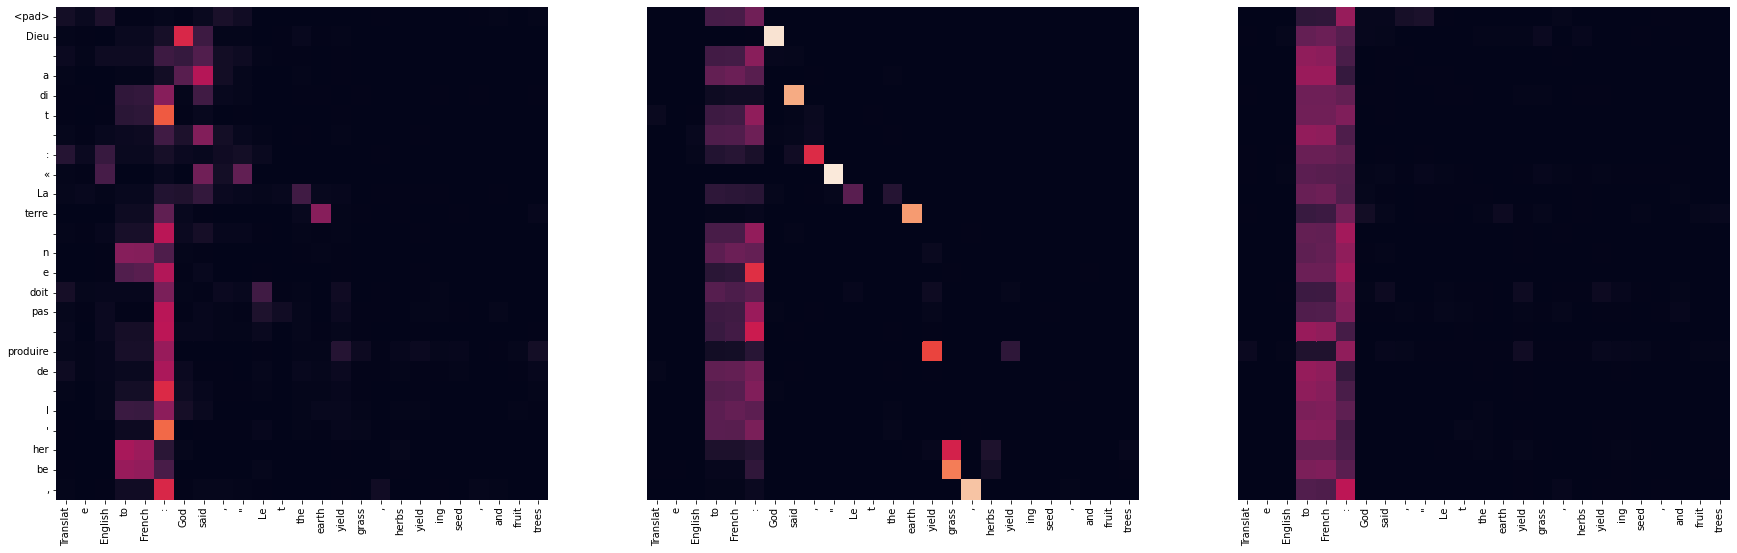

Cross attention Layer 2


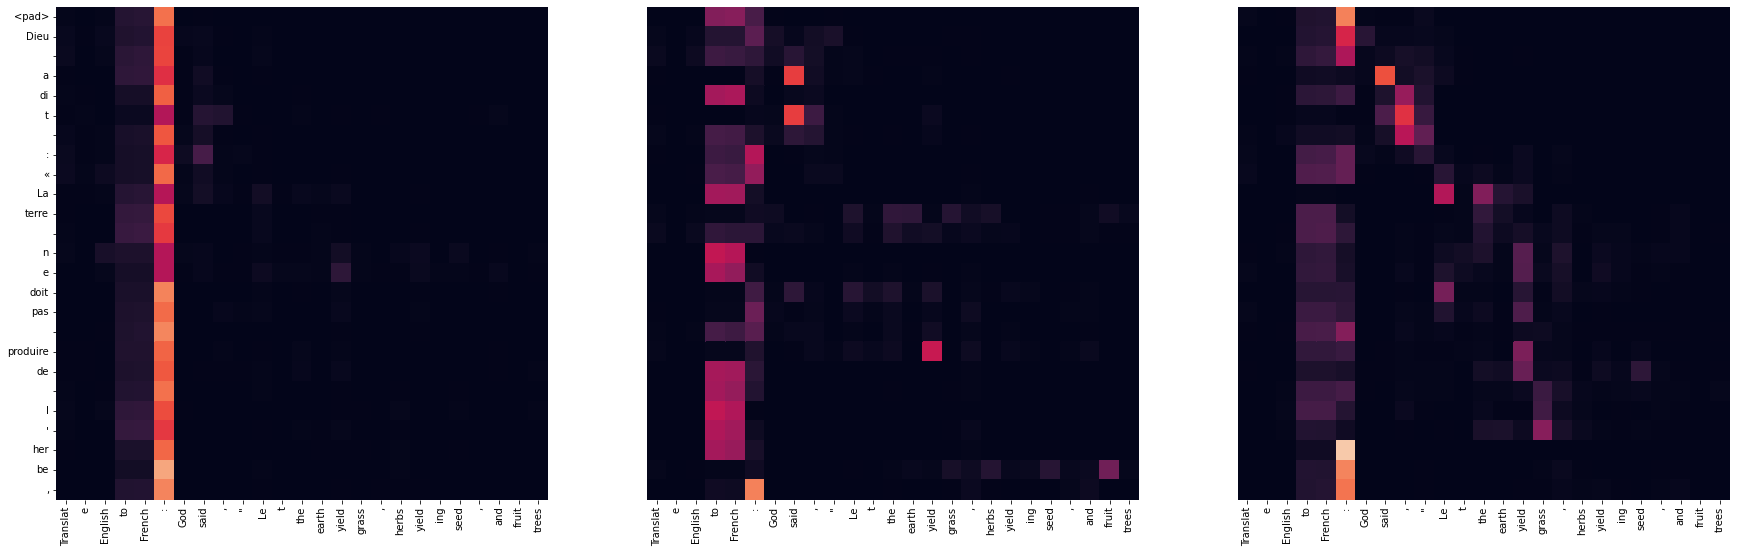

Cross attention Layer 3


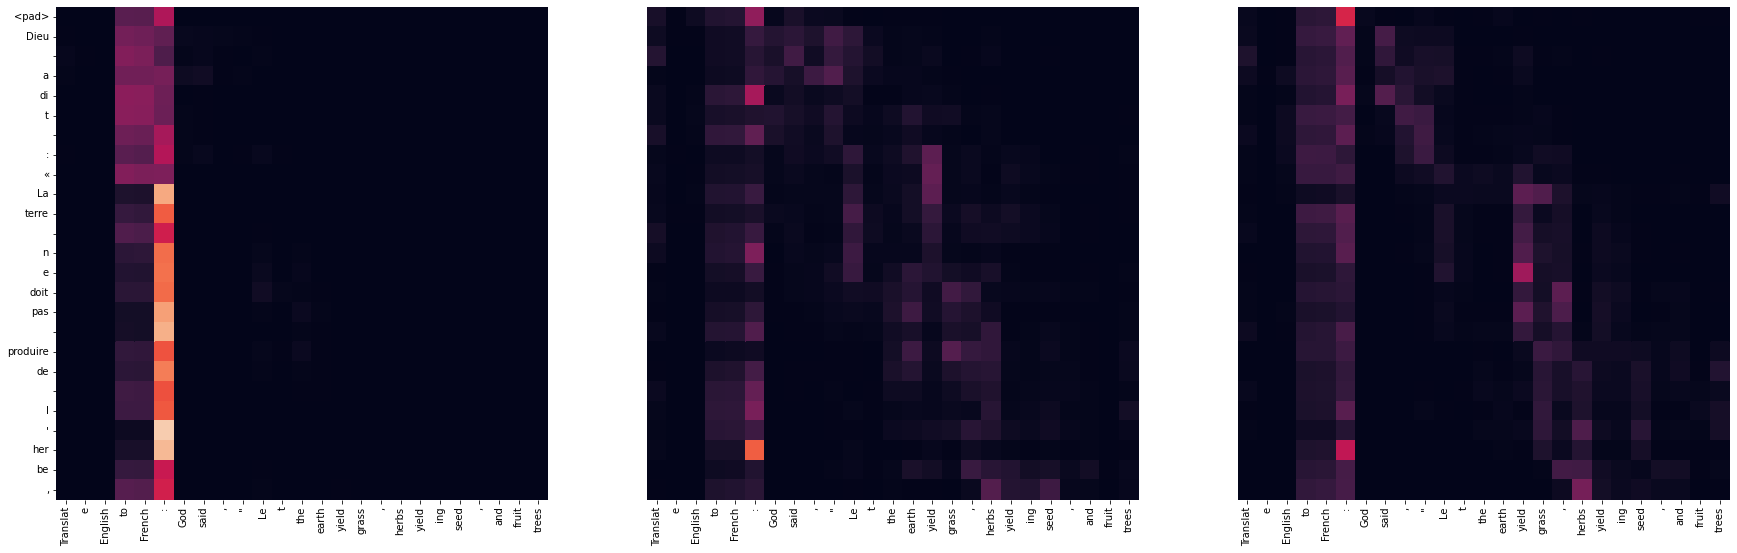

Cross attention Layer 4


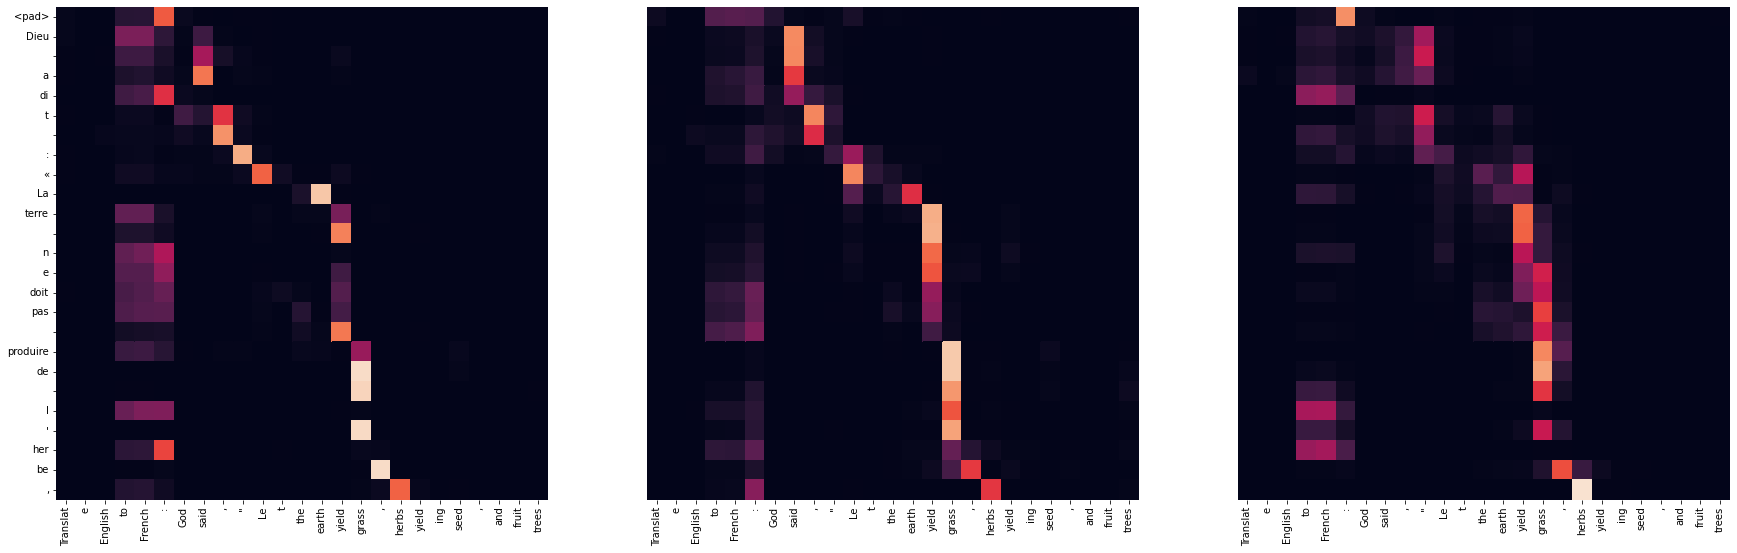

Cross attention Layer 5


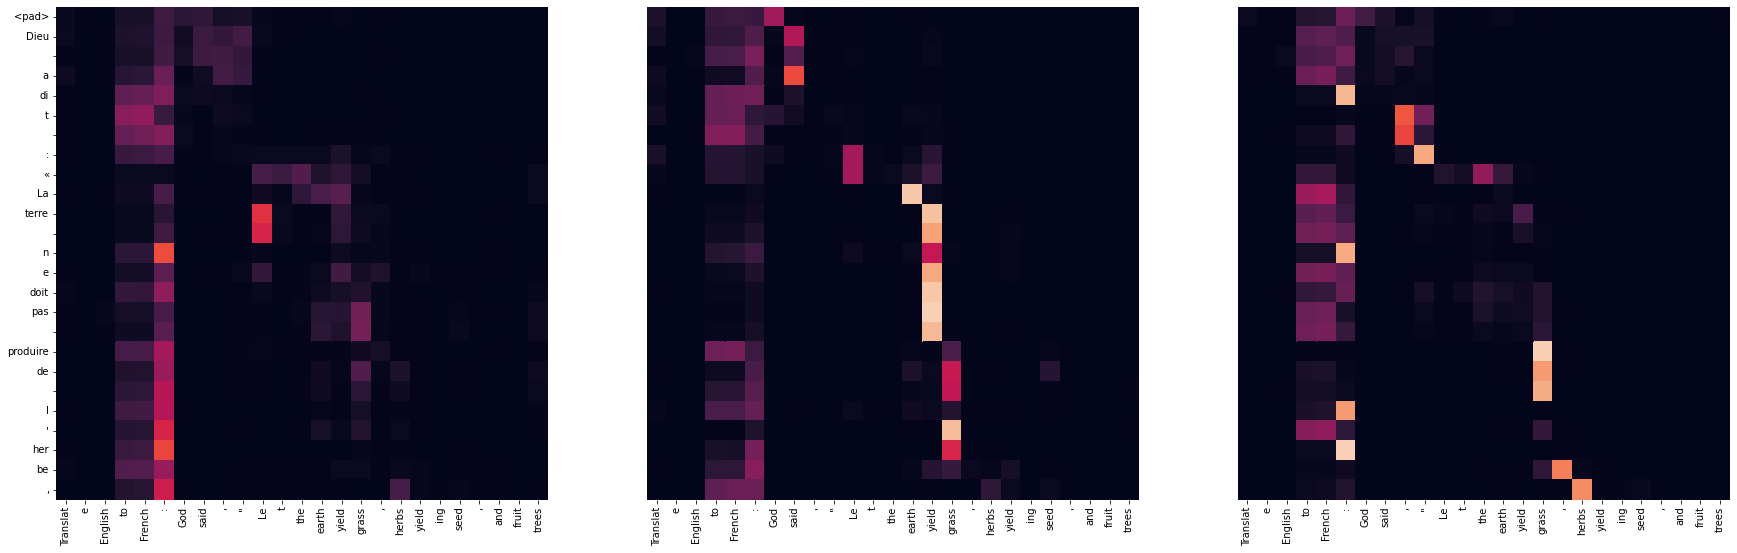

Cross attention Layer 6


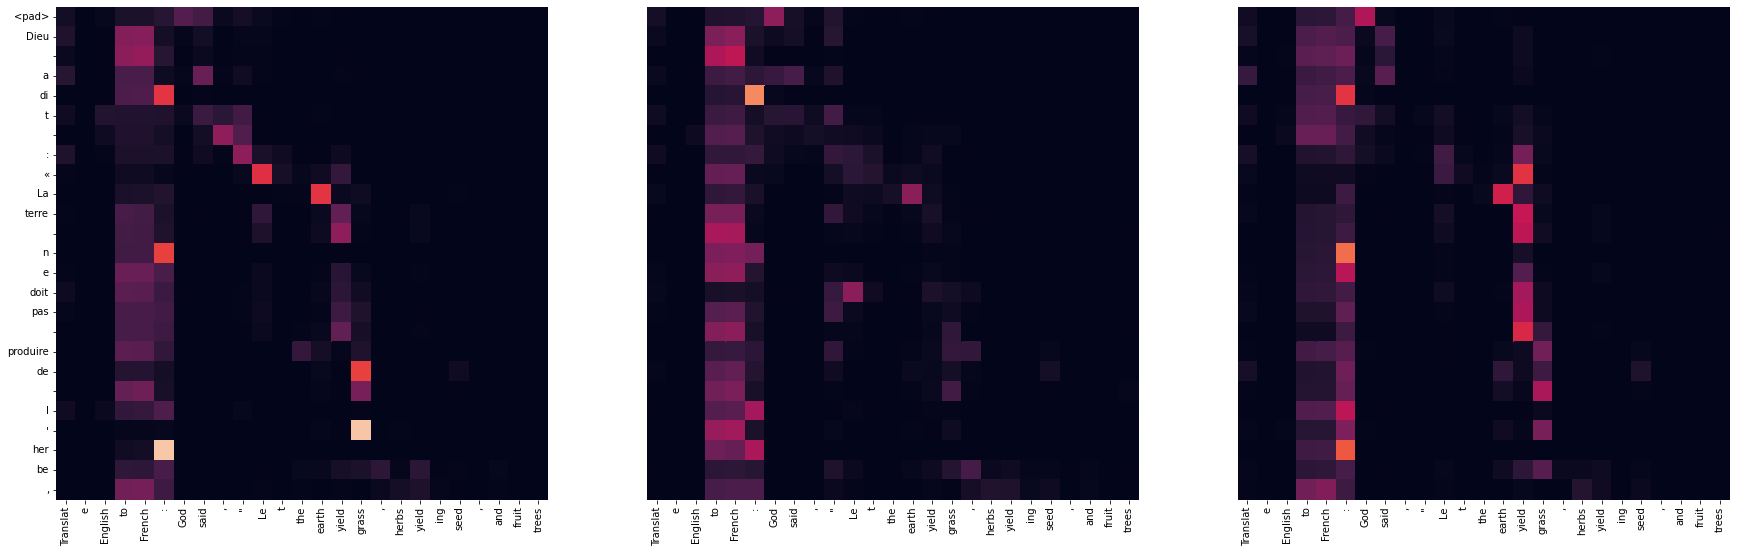

In [49]:
draw_cross_attention("translation", max_size = 25)

### Second plot: translation, with averaged heads.

Cross attention Layer 1


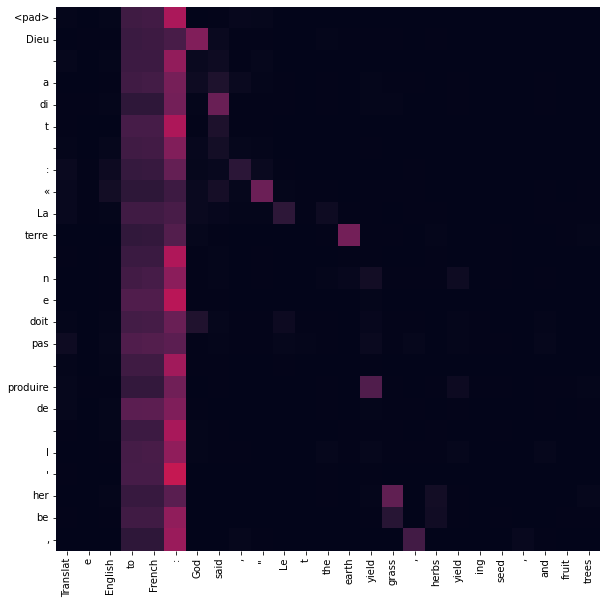

Cross attention Layer 2


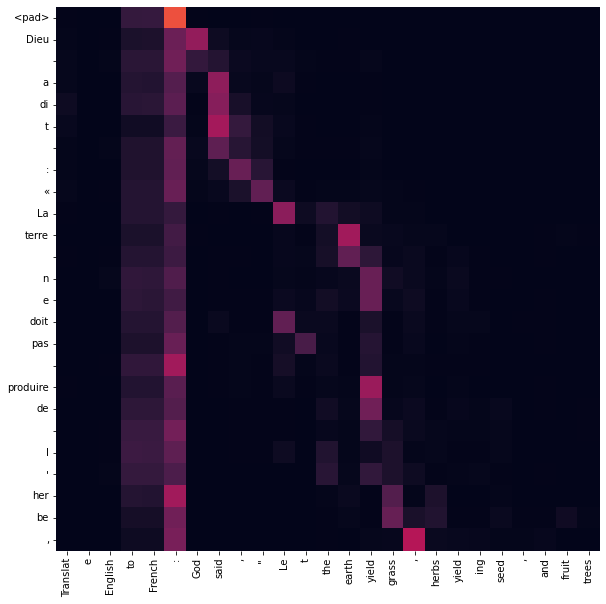

Cross attention Layer 3


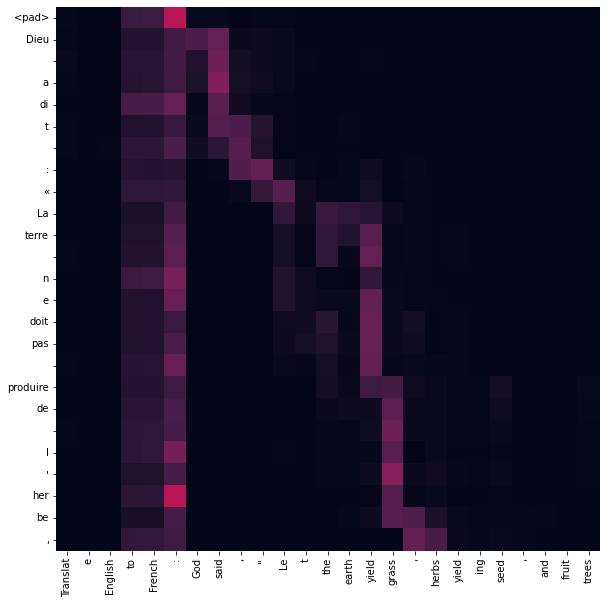

Cross attention Layer 4


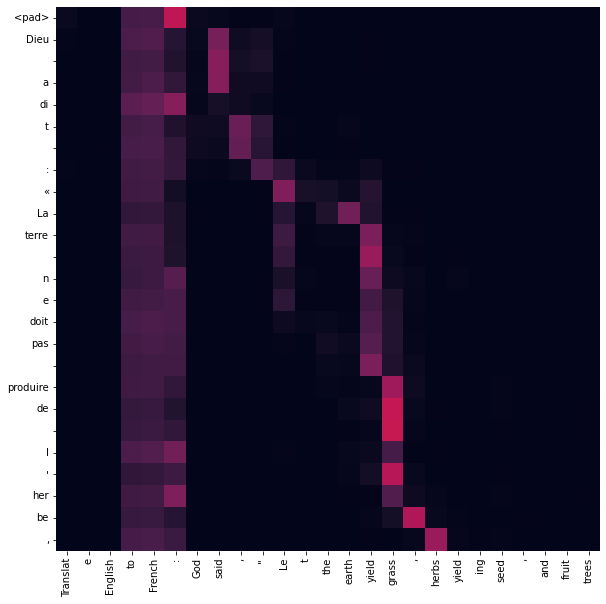

Cross attention Layer 5


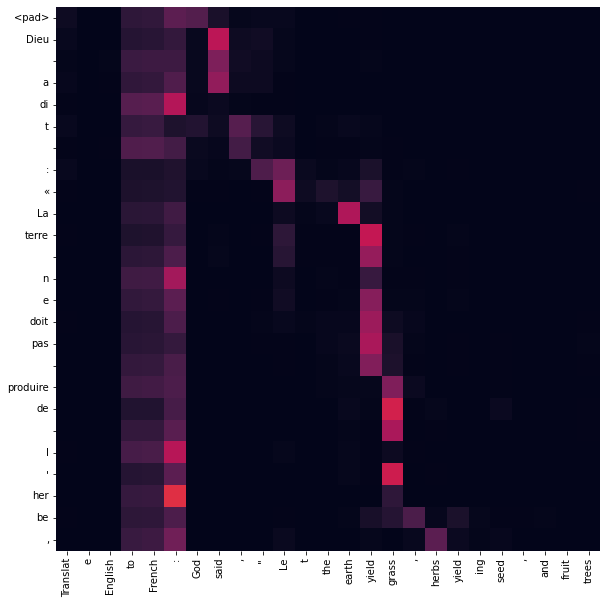

Cross attention Layer 6


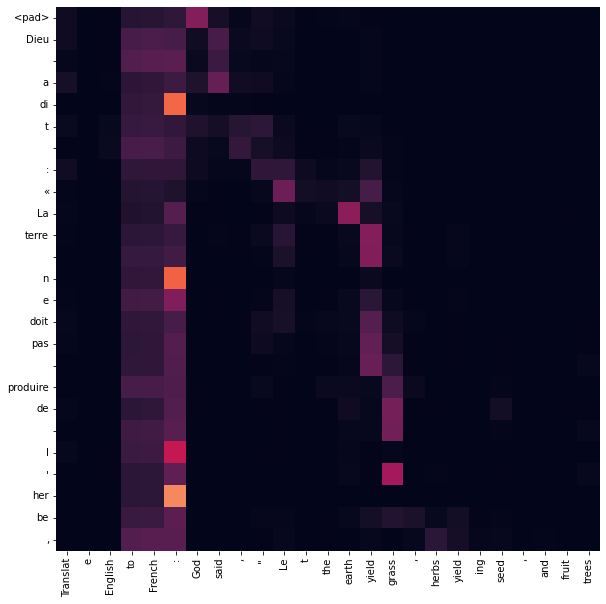

In [50]:
draw_cross_attention("translation", max_size = 25, average_heads = True)

### Third plot: Summarization task.

Cross attention Layer 1


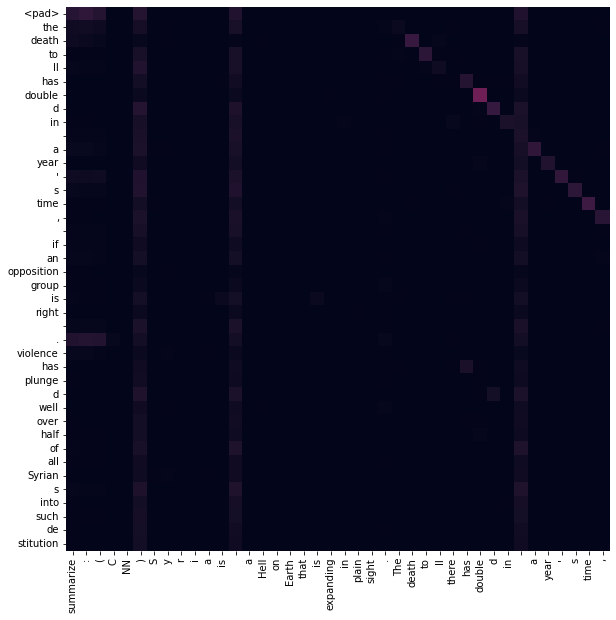

Cross attention Layer 2


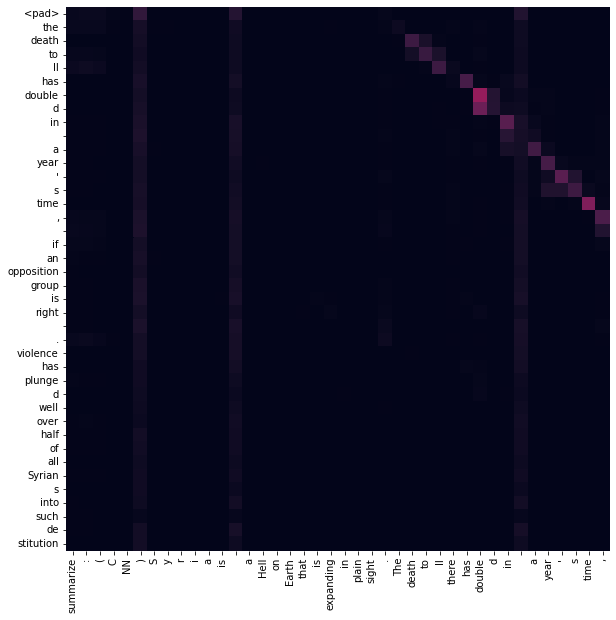

Cross attention Layer 3


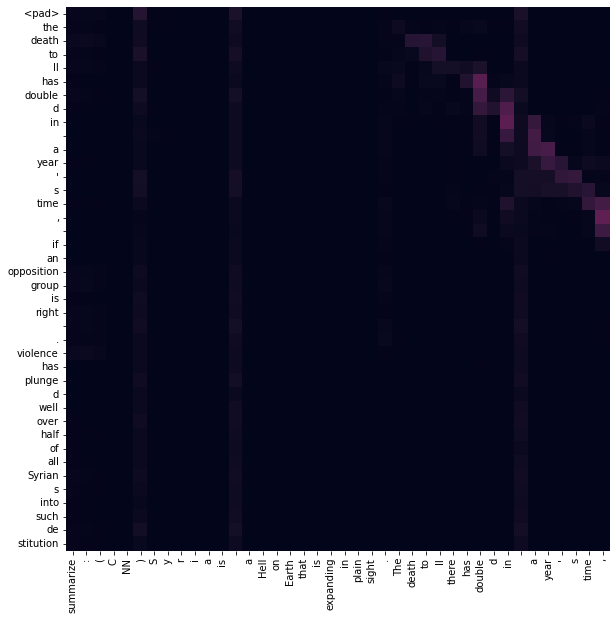

Cross attention Layer 4


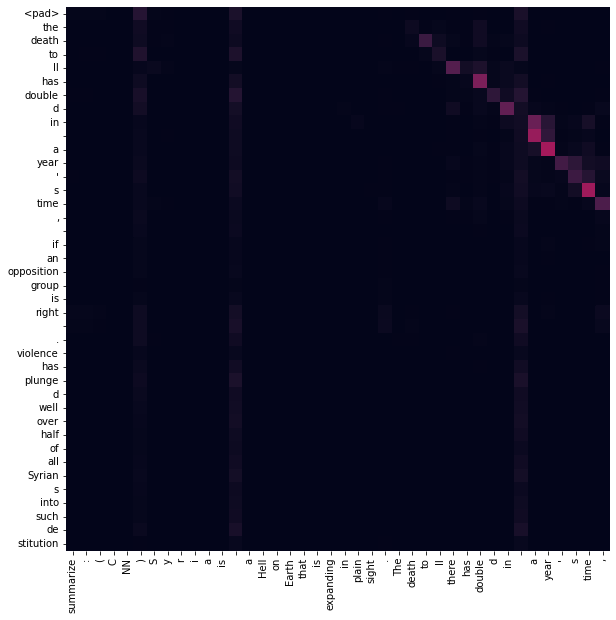

Cross attention Layer 5


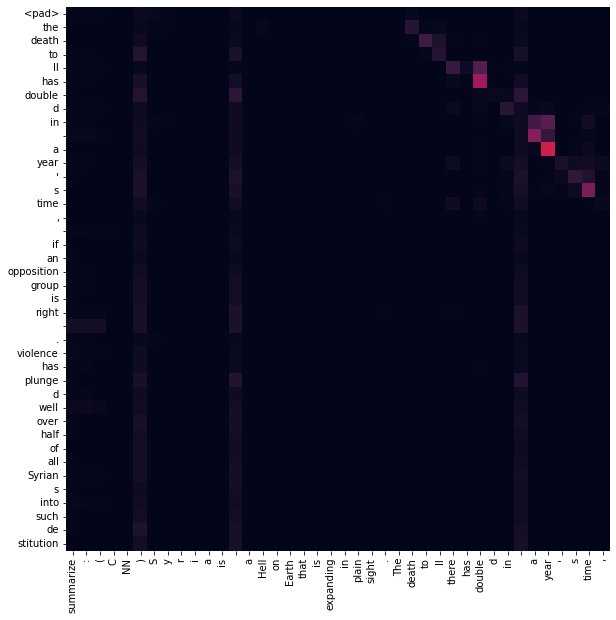

Cross attention Layer 6


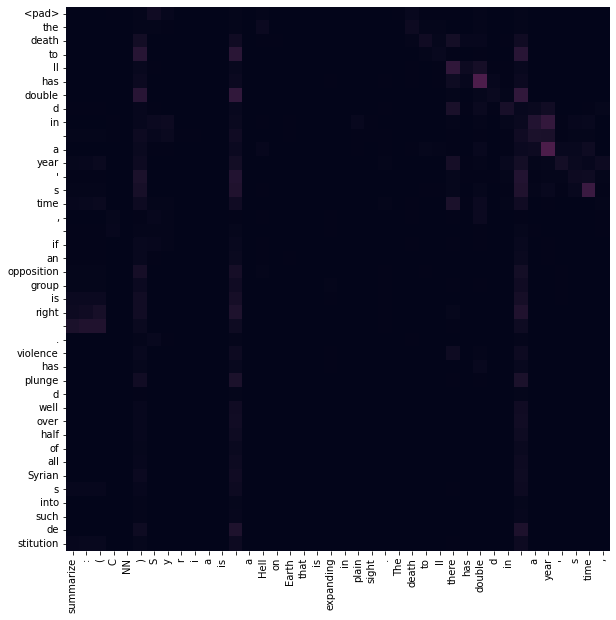

In [51]:
draw_cross_attention("summarization", index = 50, average_heads = True, max_size = 40)

## Short report

The first plot shows that even for a fixed layer, the heads can have very different cross-attention patterns, and some are more understandable than others. This can be linked with the next plots and Voita et al. (2021), which show that only a few heads are interpretable, and these are the ones that are the most usefull for the model's performance.

In the second plot, the cross attentions are averaged for each layers. There are strange vertical patterns at the beginning, but they only represent the task to do, and are not very interpretable. Apart from that, one can see that there is a strong tendency on the diagonal. This can be interpreted, since one can see that the peaks of attentions are between an english word and its direct translation in French: for example, in the first layer, there is a strong attention between the words "earth" and "terre".

Finally, to change tasks, the third plot shows the average cross attentions for the summarization task. There are only a few significant values of the cross-attentions, and they respect a diagonal pattern too. We decided to show this example because this pattern is interesting: the diagonal is shifted to the right. This can be seen directly on the output of the model (the summary): the beginning of the sentence has been omitted on the summary. Several words have been taken for the summary in the output of the model, this explains the shift. Furthermore, there are once again vertical patterns, which are linked to blank spaces in the token. This could mean that the model is focused on these spaces, since it cannot be summarized easily (there is no real meaning).

# Deliverable 2.2 (4 pt)

For this task, we implement the confidence metric, which is an agregate of the attention for each head. This metric has been described in Voita et al. (2019) [https://aclanthology.org/P19-1580.pdf] and in Kim et al. (2021) [https://aclanthology.org/2021.findings-acl.250.pdf].
The result has been averaged on 100 examples to reduce variability.

In [52]:
def draw_aggregation_confidence_cross_attention(task, corpus_size = 100):
  attention_aggregation = np.zeros((6,8))
  if task == "summarization":
    model = t5_cnn_runner.model.to(device)
    tok =t5_cnn_runner.tokenizer
  elif task == "translation":
    model = t5_bible_runner.model.to(device)
    tok = t5_bible_runner.tokenizer
  else:
    model = t5_boolq_runner.model.to(device)
    tok = t5_boolq_runner.tokenizer

  for index in range(corpus_size):
    if task == "summarization":
      input_sample = "summarize: " + cnn_dailymail_dataset[index]['article']
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)

    elif task == "translation":
      input_sample = "Translate English to French: " + bible_para_dataset[index]['en']
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
        
    else:
      input_1 = t5_boolq_runner.task_prefix[0] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[0]]
      input_2 = t5_boolq_runner.task_prefix[1] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[1]]
      input = input_1 + input_2
      input_sample = input
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
    
    model_output_with_att = model.generate(
        input_ids,
        max_length=512,
        attention_mask=attention_mask,
        output_attentions=True,
        return_dict_in_generate=True,
    )

    input_length = attention_mask.sum().item()

    input_tokens = [
        tok.decode(input_ids[0][i], skip_special_tokens=False)
        for i in range(input_length)
    ]
    output_tokens = [
        tok.decode(
            model_output_with_att.sequences[0][i], skip_special_tokens=False
        )
        for i in range(model_output_with_att.sequences[0].shape[0])
    ]

    
    for layer in range(6):
      for head in range(8):
        data = [
                1/len(input_tokens)*np.amax(attention_layer[layer][0, head].cpu().detach().numpy())
                for attention_layer in model_output_with_att.cross_attentions
            ]

        attention_aggregation[layer,head] += np.sum(data)
            
  seaborn.heatmap(attention_aggregation/corpus_size, cbar = True) 
  plt.xlabel("Heads")
  plt.ylabel("Layers")
  plt.show()

### First plot: translation task.

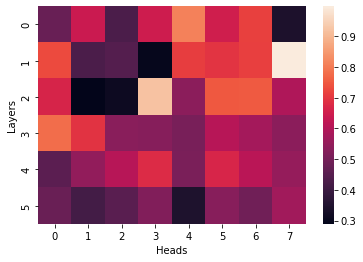

In [53]:
draw_aggregation_confidence_cross_attention("translation", corpus_size = 100)

### Second plot: Question Answering task.

Token indices sequence length is longer than the specified maximum sequence length for this model (824 > 512). Running this sequence through the model will result in indexing errors


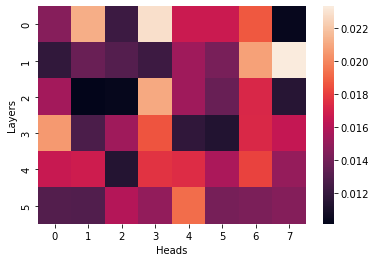

In [54]:
draw_aggregation_confidence_cross_attention("QandA", corpus_size = 100)

We then compute another metric, which is the coverage. This metric has been explained in Tu et al. (2016) [https://aclanthology.org/P16-1008.pdf] and in Kim et al. (2021). We compute it for the cross attention, and we average it on 100 examples.

In [55]:
def draw_coverage_cross_attention(task, corpus_size = 100):
  coverage = np.zeros((6,8))
  if task == "summarization":
    model = t5_cnn_runner.model.to(device)
    tok =t5_cnn_runner.tokenizer
  elif task == "translation":
    model = t5_bible_runner.model.to(device)
    tok = t5_bible_runner.tokenizer
  else:
    model = t5_boolq_runner.model.to(device)
    tok = t5_boolq_runner.tokenizer

  for index in range(corpus_size):
    
    if task == "summarization":
      input_sample = "summarize: " + cnn_dailymail_dataset[index]['article']
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)

    elif task == "translation":
      input_sample = "Translate English to French: " + bible_para_dataset[index]['en']
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
        
    else:
      input_1 = t5_boolq_runner.task_prefix[0] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[0]]
      input_2 = t5_boolq_runner.task_prefix[1] + t5_boolq_runner.dataset[index][t5_boolq_runner.input_key[1]]
      input = input_1 + input_2
      input_sample = input
      input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
      attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
    
    model_output_with_att = model.generate(
        input_ids,
        max_length=512,
        attention_mask=attention_mask,
        output_attentions=True,
        return_dict_in_generate=True,
    )

    input_length = attention_mask.sum().item()

    input_tokens = [
        tok.decode(input_ids[0][i], skip_special_tokens=False)
        for i in range(input_length)
    ]
    output_tokens = [
        tok.decode(
            model_output_with_att.sequences[0][i], skip_special_tokens=False
        )
        for i in range(model_output_with_att.sequences[0].shape[0])
    ]

    
    for layer in range(6):
      for head in range(8):
        data = [
                attention_layer[layer][0, head].cpu().detach().numpy()
                for attention_layer in model_output_with_att.cross_attentions
            ]

        data = np.array(data)
        imax,_, jmax= data.shape
        for j in range(jmax):
          sumcov = 0
          for i in range(imax):
            sumcov += data[i,0,j]**2
        coverage[layer,head] += sumcov
            
  seaborn.heatmap(coverage/corpus_size, cbar = True)
  plt.xlabel("Heads")
  plt.ylabel("Layers")
  plt.show()

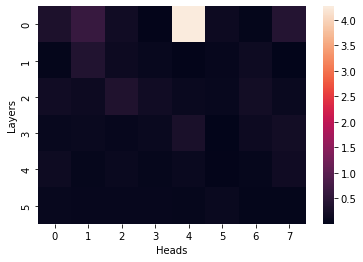

In [56]:
draw_coverage_cross_attention("translation", corpus_size = 100)

## Short report

The first thing one can notice with the three plots are the different orders of magnitude between the metrics, even for the same metric, for two different tasks (first two plots). This observation comes from the fact that the dataset examples have very different sizes (sentences for the summarization task are much longer), hence the normalization is stronger.

Again for the first two tasks, it is interesting to notice that given a head, the values of the confidence are similar from one task to another. It seems that important heads are important for both tasks, and conversely heads that can be pruned in one task can be pruned for the other. This can indicate that one can indeed prune many heads without a significant loss in the model's performance, as stated in Voita et al (2021).

Finally, for the second metric, the coverage (third plot), the result is even stronger: only one or two heads seem to be significant with respect to this measure. However, an important coverage is more difficult to interpret for a given head than other metrics such as confidence, all the more so for the cross-attention. It seems that the highest values of coverage are obtained in the top layer, which is in agreement with the results presented in Kim et al (2021).

Overall, the first layers tend to be more significant than the deepest ones, at least for the datasets and the model considered. However, this model can achieve multi-tasks, it is not specialized. Hence, this could explain that the deepest layers may not be as used as for a specialized model.

# Bonus 1 (experiment with finetuning)

### Deliverable Bonus 1 (3pt)

In [57]:
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer

class MTModelRunner:
  def __init__(self, dataset, input_key, output_key):
    self.dataset = dataset
    self.input_key = input_key
    self.output_key = output_key

    model_name_mt = "Helsinki-NLP/opus-mt-en-fr"

    self.tokenizer = AutoTokenizer.from_pretrained(model_name_mt)
    self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name_mt)

  def run_one_example(self, index):
    input = self.dataset[index][self.input_key]
    input_ids = self.tokenizer(input, return_tensors="pt", max_length=512).input_ids

    output = self.model.generate(input_ids)
    decoded = self.tokenizer.decode(output[0], skip_special_tokens=True)

    reference = self.dataset[index][self.output_key]
    return decoded, reference

In [58]:
bible_para_dataset = load_dataset("bible_para", "en-fr")
bible_para_dataset = [
                      bible_para_dataset["train"][i]["translation"]
                      for i in range(len(bible_para_dataset["train"]))
                      ]

mt_helsinki_bible_runner = MTModelRunner(dataset=bible_para_dataset,
                                input_key="en",
                                output_key="fr"
                                )

mt_helsinki_bible_runner.run_one_example(0)

Reusing dataset bible_para (/root/.cache/huggingface/datasets/bible_para/en-fr/1.0.0/b6cc20bcbfb0299beeba1dcc80a8420b975938ca0eef75b3ed30b50df7d950b1)


Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/784k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/287M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


('Au commencement, Dieu créa les cieux et la terre.',
 'Au commencement, Dieu créa les cieux et la terre.')

In [59]:
print("Examples for translation (Bible dataset) - Comparaison with T5-small")

for i in range(5):
  bible_prediction_t5, bible_reference_t5 = t5_bible_runner.run_one_example(i)
  bible_prediction_helsinki, _ = mt_helsinki_bible_runner.run_one_example(i)
  print(f"Source: {bible_para_dataset[i]['en']}")
  print(f"Target: {bible_reference_t5}")
  print(f"Generated (fine-tuned): {bible_prediction_helsinki}")
  print(f"Generated (t5-small): {bible_prediction_t5}")
  print("\n")
  print("---------------------------------------------")
  print("\n")

Examples for translation (Bible dataset) - Comparaison with T5-small
Source: In the beginning God created the heavens and the earth.
Target: Au commencement, Dieu créa les cieux et la terre.
Generated (fine-tuned): Au commencement, Dieu créa les cieux et la terre.
Generated (t5-small): Au début, Dieu a créé les cieux et la terre.


---------------------------------------------


Source: Now the earth was formless and empty. Darkness was on the surface of the deep. God's Spirit was hovering over the surface of the waters.
Target: La terre était informe et vide: il y avait des ténèbres à la surface de l`abîme, et l`esprit de Dieu se mouvait au-dessus des eaux.
Generated (fine-tuned): Or la terre était sans forme et vide. L'obscurité était à la surface de l'abîme. L'Esprit de Dieu planait sur la surface des eaux.
Generated (t5-small): La terre était désormais sans forme et vide, la fébril


---------------------------------------------


Source: God said, "Let there be light," and there w

In [60]:
max_examples = 100
predictions_t5 = []
predictions_helsinki = []
references = []


for i in range(max_examples):
  bible_prediction_t5, bible_reference = t5_bible_runner.run_one_example(i)
  bible_prediction_helsinki, _ = mt_helsinki_bible_runner.run_one_example(i)
  predictions_t5.append(bible_prediction_t5)
  predictions_helsinki.append(bible_prediction_helsinki)
  references.append([bible_reference])

bleu_t5_small = 0.0
bleu_helsinki = 0.0
for i in range(max_examples):
  current_bleut_t5_small = sacrebleu.corpus_bleu([predictions_t5[i]], [references[i]]).score / 100
  current_bleut_helsinki = sacrebleu.corpus_bleu([predictions_helsinki[i]], [references[i]]).score / 100
  bleu_t5_small += current_bleut_t5_small
  bleu_helsinki += current_bleut_helsinki

bleu_t5_small /= max_examples
bleu_helsinki /= max_examples

print(f"Bleu - T5-small: {bleu_t5_small}")
print(f"Bleu - Helsinki: {bleu_helsinki}")

Bleu - T5-small: 0.04757936180249685
Bleu - Helsinki: 0.35186832058610273


In [61]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

def draw_aggregation_confidence_cross_attention_modified(corpus_size = 100):
  attention_aggregation = np.zeros((6,8))
  model = mt_helsinki_bible_runner.model.to(device)
  tok = mt_helsinki_bible_runner.tokenizer

  for index in range(corpus_size):

    input_sample = "Translate English to French: " + bible_para_dataset[index]['en']
    input_ids = tok(input_sample,return_tensors="pt").input_ids.to(device)
    attention_mask = tok(input_sample, return_tensors="pt").attention_mask.to(device)
    
    model_output_with_att = model.generate(
        input_ids,
        max_length=512,
        attention_mask=attention_mask,
        output_attentions=True,
        return_dict_in_generate=True,
    )

    input_length = attention_mask.sum().item()

    input_tokens = [
        tok.decode(input_ids[0][i], skip_special_tokens=False)
        for i in range(input_length)
    ]
    output_tokens = [
        tok.decode(
            model_output_with_att.sequences[0][i], skip_special_tokens=False
        )
        for i in range(model_output_with_att.sequences[0].shape[0])
    ]

    
    for layer in range(6):
      for head in range(8):
        data = [
                1/len(input_tokens)*np.amax(attention_layer[layer][0, head].cpu().detach().numpy())
                for attention_layer in model_output_with_att.cross_attentions
            ]

        attention_aggregation[layer,head] += np.sum(data)
            
  seaborn.heatmap(attention_aggregation/corpus_size, cbar = True) 
  plt.xlabel("Heads")
  plt.ylabel("Layers")
  plt.show()

Specialized model:


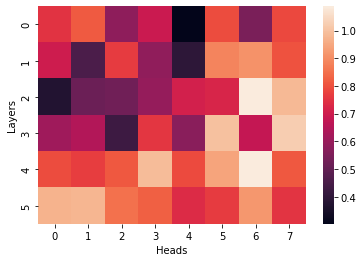

t5 model:


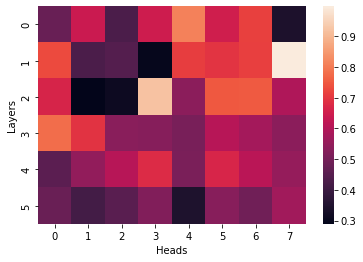

In [62]:
print("Specialized model:")
draw_aggregation_confidence_cross_attention_modified(corpus_size = 100)
print("t5 model:")
draw_aggregation_confidence_cross_attention("translation",corpus_size = 100)

# Table

| Model | BLEU score (bible dataset) |
| --- | --- |
| T5-small | 0.05 |
| Helsinki | 0.35 |


# Short report

One can see that by using a model that has been specifically pretrained for the Machine Translation task, we get an increase in the BLEU score of 0.3 points (from 0.05 for the t5-small model to 0.35 with the fine-tuned model). Therefore, we can state that we always get better performance by applying a model to a task for which it has been specifically trained. However, this also means that this model isn't able to generalise to any other task, and is especially not able to perform Machine Translation for any other pair of languages (we would need to pick the model trained for the other pair of languages). Thus, models like t5-small that has been trained on multiple tasks together is better suited for use cases like multi-languages translation or in a case where we want to develop a product that needs to perform both MT and QA for example, and if we prefer to limit the numbero f different models.

For the application of the second task, we decided to plot the confidence metric for the cross attention, since it is easily interpretable. The results are clear: the values of the confidence are greater for the fine-tuned model, specially for the deepest layers. We already saw that for the t5-small model, the heads in these layers were not associated with big confidence, and we said that this could be explained by the fact that this model is multi-task, hence it does not rely on the deepest layers to be flexible. The comparison with the fine-tuned model seems to confirm this observation. One can notice that this difference is also visible in the computationnal cost: the fine-tuned model is also longer to generate the outputs from the same inputs.

# Bonus 2 (implement Minimum Bayes Risk Decoding)

## Deliverable Bonus 2 (5pt):

In [63]:
from nltk.translate.meteor_score import meteor_score

word_tokenizer = MosesTokenizer("fr")

class MinimumBayesRiskMT:
  def __init__(self, dataset, n_samples: int = 30):
    self.n_samples = n_samples
    self.dataset = dataset

    self.task_prefix = "Translate English to French: "
    self.max_length = 512

    self.tokenizer = T5Tokenizer.from_pretrained("t5-small")
    self.model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

    self.utility_metric = meteor_score

  def run_one_example(self, index):
    input = self.task_prefix + self.dataset[index]["en"]
    input_ids = self.tokenizer(
        input, return_tensors="pt", max_length=self.max_length, truncation=True
    ).input_ids.to(device)
    all_decoded_outputs = []
    for s in range(self.n_samples):
      output = self.model.generate(
          input_ids,
          do_sample=True,
      )
      decoded = self.tokenizer.decode(output[0], skip_special_tokens=True)
      all_decoded_outputs.append(decoded)
    best_mbr_sample = self.find_mbr(all_decoded_outputs)
    reference = self.dataset[index]["fr"]

    return best_mbr_sample, reference

  def find_mbr(self, all_decoded_outputs):
    scores = []
    for i in range(len(all_decoded_outputs)):
      current_score = 0.0
      y = all_decoded_outputs[i]
      for s in range(len(all_decoded_outputs)):
        if s != i:
          h = all_decoded_outputs[s]
          current_score += self.utility_metric(
              [word_tokenizer(y)], word_tokenizer(h)
          )
      current_score /= (self.n_samples - 1)
      scores.append(current_score)
    return all_decoded_outputs[np.argmax(scores)]


In [64]:
# Running MRB

t5_mrb_runner = MinimumBayesRiskMT(
    dataset=bible_para_dataset, n_samples=30
)

t5_mrb_runner.run_one_example(0)

('Au début, Dieu a créé les cieux et la terre.',
 'Au commencement, Dieu créa les cieux et la terre.')

In [65]:
max_examples = 50
predictions_t5_mrb = []
references = []


for i in range(max_examples):
  bible_prediction_t5_mrb, bible_reference = t5_mrb_runner.run_one_example(i)
  predictions_t5_mrb.append(bible_prediction_t5_mrb)
  references.append([bible_reference])

bleu_t5_mrb = 0.0
for i in range(max_examples):
  current_bleut_t5_mrb = sacrebleu.corpus_bleu(
      [predictions_t5_mrb[i]], [references[i]]
  ).score / 100
  bleu_t5_mrb += current_bleut_t5_mrb

bleu_t5_mrb /= max_examples

print(f"Bleu - T5-small MRB: {bleu_t5_mrb}")

Bleu - T5-small MRB: 0.05870989248252975


In [66]:
# Comparison with BEAM SEARCH

num_beams_list = [5, 10, 15]

mt_beam_search_results = {
    num_beams: compute_bleu_metric_different_decoding(
        {
          "num_beams": num_beams,
          "early_stopping": True,
        }, n_examples=max_examples
    )
    for num_beams in num_beams_list
}

In [67]:
print("BEAM SEARCH BLEU")
print({key: r["bleu"] for key, r in mt_beam_search_results.items()})

BEAM SEARCH BLEU
{5: 0.047087311588876926, 10: 0.045351197281139094, 15: 0.043575105125710445}


In [68]:
# Comparison with METEOR score

meteor_scores = {}

for beam_search_value, result in mt_beam_search_results.items():
  predictions = result["predictions"]
  current_score = 0.0
  for i, prediction in enumerate(predictions):
    reference = references[i][0]
    current_score += meteor_score(
        [word_tokenizer(reference)], word_tokenizer(prediction)
    )
  meteor_scores[f"beam_search_{beam_search_value}"] = current_score / len(predictions)

mrb_meteor = 0.0
for i, prediction in enumerate(predictions_t5_mrb):
    reference = references[i][0]
    mrb_meteor += meteor_score(
        [word_tokenizer(reference)], word_tokenizer(prediction)
    )
meteor_scores[f"MRB"] = mrb_meteor / len(predictions_t5_mrb)

In [69]:
meteor_scores

{'MRB': 0.21312403891840465,
 'beam_search_10': 0.1854322806047738,
 'beam_search_15': 0.17167731661500885,
 'beam_search_5': 0.19852668970350662}

### Table:

| Decoding methods | BLEU | METEOR |
| --- | --- | --- |
| Beam Search (5 beams) | 0.047 | 0.20 | 
| Beam Search (10 beams) | 0.045 | 0.19 |
| Beam Search (15 beams) | 0.043 | 0.17 |
| --- | --- | --- |
| Minimum Bayes Risk | 0.055 | 0.21 |

### Short Summary:

We have been looking at the Machine Translation task, with the T5-small model. First, we have been experimenting with Beam Search decoding for different number of beams (5 / 10 / 15). As already discussed in TASK 1, this decoding method is deterministic and allows to find sequences with higher probabilities than with greedy decoding, but does not guarantee to increase the score as the number of beams increases (here the score BLUE even decreases). Then, we have been looking at the Minimum Bayes Risk decoding method (using S=30 samples for the estimations as done in https://arxiv.org/pdf/2005.10283.pdf, with the METEOR utility function). It achieves a better scores (both methods have been evaluated with BLUE and METEOR scores). This method allows to exploit more information about the posterior probability distribution (as we look at more samples in the hypotheses space than with classic sampling). The method we have been using, through the METEOR metric, has the advantage of not requiring any reference (as we look at METEOR score of pairs of hypotheses). We would tend to use such decoding method when we are more confident in the model's outputs' expectation (as explained in the Eikema & Aziz paper) than when we are only looking at modes (so greedy decoding for example) ; and thus MRB method can lead to more robust outputs that can be used with more confidence when we are developing a product that needs to take "decisions". Finally, the authors namely recall that Beam Search suffers from a bias: it tends to output rare events, as it tries to maximize the sequence probability. Thus, MRB might be prefered to prevent too rare events.

